In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from PIL import Image
from io import BytesIO

In [2]:
data = pd.read_csv('../Final_data/SHP2_train_descriptors_2741.csv')
data

SMILES  MaxEStateIndex  \
0     Cc1nc(cc(=O)n1-c1cccc(Cl)c1Cl)N1CCC2(Cc3ccccc3...       12.992564   
1     N[C@@H]1CCCC11CCN(CC1)c1cnc(Sc2cccc(NC(=O)c3c(...       13.061568   
2     N[C@@H]1c2ccccc2CC11CCN(CC1)c1nc(N)c(C2=C(Cl)C...       12.340744   
3     N[C@@H]1C[C@H](O)CC11CCN(CC1)c1ncc(Sc2cccc(Cl)...       10.063495   
4     C[C@@H]1OCC2(CCN(CC2)c2ncc(Sc3cccc(Cl)c3Cl)c3n...        6.464779   
...                                                 ...             ...   
2736  CC(C)(C)c1ccc(Oc2ccc(NC(=O)C3=CO[C@@H](O[C@@H]...       13.333207   
2737  O=C(O)C1=CO[C@@H](O[C@@H]2O[C@H](COCc3ccccc3)[...       12.516733   
2738  CCOS(=O)(=O)/C=C/c1ccc(OCC2=CC[C@@H]3C(C(=O)Nc...       13.462705   
2739  CCOS(=O)(=O)/C=C/c1ccc(OCC2=CC[C@@H]3C(C(=O)Nc...       13.659530   
2740  O=C1C[C@@H](O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O...       10.878646   

      MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex       qed    MolWt  \
0          -0.169513          12.992564           0.068072  0.609173  455.389   
1          -0.781987          13.061568           0.246174  0.340043  597.145   
2          -0.676170          12.340744           0.017202  0.606557  485.419   
3          -0.264210          10.063495           0.058620  0.603375  464.422   
4           0.086398           6.464779           0.086398  0.614971  464.422   
...              ...                ...                ...       ...      ...   
2736       -1.619179          13.333207           0.045316  0.248676  597.661   
2737       -1.051943          12.516733           0.156681  0.076526  824.967   
2738       -3.710843          13.462705           0.073907  0.112068  679.791   
2739       -3.730454          13.659530           0.066112  0.099496  793.132   
2740       -1.487108          10.878646           0.036727  0.400424  264.230   

      HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  ...  fr_sulfonamd  \
0            431.197  454.132717                  160  ...             0   
1            563.881  596.208486                  216  ...             0   
2            459.211  484.154515                  172  ...             0   
3            441.238  463.100037                  158  ...             0   
4            441.238  463.100037                  158  ...             0   
...              ...         ...                  ...  ...           ...   
2736         558.349  597.257396                  232  ...             0   
2737         772.551  824.356048                  316  ...             0   
2738         642.495  679.223988                  252  ...             0   
2739         757.852  791.095528                  264  ...             0   
2740         248.102  264.084517                  104  ...             0   

      fr_sulfone  fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  \
0              0                  0             0            0            0   
1              0                  0             0            0            0   
2              0                  0             0            0            0   
3              0                  0             0            0            0   
4              0                  0             0            0            0   
...          ...                ...           ...          ...          ...   
2736           0                  0             0            0            0   
2737           0                  0             0            0            0   
2738           0                  0             0            0            0   
2739           0                  0             0            0            0   
2740           0                  0             0            0            0   

      fr_thiophene  fr_unbrch_alkane  fr_urea  IC50(microM)  
0                0                 0        0        0.0008  
1                0                 0        0         0.001  
2                0                 0        0         0.001  
3                0                 0        0        0.0012  
4  

In [3]:
def activity(s):
    if s[0] == '<':
        if float(s[1:]) <= 1:
            return "Strong Inhibitor"
        else:
            return np.nan
    elif s[0] == '>':
        if float(s[1:]) >= 1:
            return "Weak Inhibitor"
        else:
            return np.nan
    else:
        if float(s) > 1:
            return "Weak Inhibitor"
        else:
            return "Strong Inhibitor"

In [4]:
data['TARGET'] = data['IC50(microM)'].apply(activity)
data

SMILES  MaxEStateIndex  \
0     Cc1nc(cc(=O)n1-c1cccc(Cl)c1Cl)N1CCC2(Cc3ccccc3...       12.992564   
1     N[C@@H]1CCCC11CCN(CC1)c1cnc(Sc2cccc(NC(=O)c3c(...       13.061568   
2     N[C@@H]1c2ccccc2CC11CCN(CC1)c1nc(N)c(C2=C(Cl)C...       12.340744   
3     N[C@@H]1C[C@H](O)CC11CCN(CC1)c1ncc(Sc2cccc(Cl)...       10.063495   
4     C[C@@H]1OCC2(CCN(CC2)c2ncc(Sc3cccc(Cl)c3Cl)c3n...        6.464779   
...                                                 ...             ...   
2736  CC(C)(C)c1ccc(Oc2ccc(NC(=O)C3=CO[C@@H](O[C@@H]...       13.333207   
2737  O=C(O)C1=CO[C@@H](O[C@@H]2O[C@H](COCc3ccccc3)[...       12.516733   
2738  CCOS(=O)(=O)/C=C/c1ccc(OCC2=CC[C@@H]3C(C(=O)Nc...       13.462705   
2739  CCOS(=O)(=O)/C=C/c1ccc(OCC2=CC[C@@H]3C(C(=O)Nc...       13.659530   
2740  O=C1C[C@@H](O[C@@H]2O[C@H](CO)[C@@H](O)[C@H](O...       10.878646   

      MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex       qed    MolWt  \
0          -0.169513          12.992564           0.068072  0.609173  455.389   
1          -0.781987          13.061568           0.246174  0.340043  597.145   
2          -0.676170          12.340744           0.017202  0.606557  485.419   
3          -0.264210          10.063495           0.058620  0.603375  464.422   
4           0.086398           6.464779           0.086398  0.614971  464.422   
...              ...                ...                ...       ...      ...   
2736       -1.619179          13.333207           0.045316  0.248676  597.661   
2737       -1.051943          12.516733           0.156681  0.076526  824.967   
2738       -3.710843          13.462705           0.073907  0.112068  679.791   
2739       -3.730454          13.659530           0.066112  0.099496  793.132   
2740       -1.487108          10.878646           0.036727  0.400424  264.230   

      HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  ...  fr_sulfone  \
0            431.197  454.132717                  160  ...           0   
1            563.881  596.208486                  216  ...           0   
2            459.211  484.154515                  172  ...           0   
3            441.238  463.100037                  158  ...           0   
4            441.238  463.100037                  158  ...           0   
...              ...         ...                  ...  ...         ...   
2736         558.349  597.257396                  232  ...           0   
2737         772.551  824.356048                  316  ...           0   
2738         642.495  679.223988                  252  ...           0   
2739         757.852  791.095528                  264  ...           0   
2740         248.102  264.084517                  104  ...           0   

      fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  \
0                     0             0            0            0             0   
1                     0             0            0            0             0   
2                     0             0            0            0             0   
3                     0             0            0            0             0   
4                     0             0            0            0             0   
...                 ...           ...          ...          ...           ...   
2736                  0             0            0            0             0   
2737                  0             0            0            0             0   
2738                  0             0            0            0             0   
2739                  0             0            0            0             0   
2740                  0             0            0            0             0   

      fr_unbrch_alkane  fr_urea  IC50(microM)            TARGET  
0                    0        0        0.0008  Strong Inhibitor  
1                    0        0         0.001  Strong Inhibitor  
2                    0        0         0.001  Strong Inhibitor  
3                    0        0        0.0012  St

In [5]:
np.array(data.columns)

array(['SMILES', 'MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt',
       'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons',
       'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge',
       'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2',
       'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI',
       'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI',
       'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v',
       'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v',
       'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2',
       'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11',
       'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3',
       'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8',
       'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3',
       'SMR_V

# QED

<AxesSubplot:>

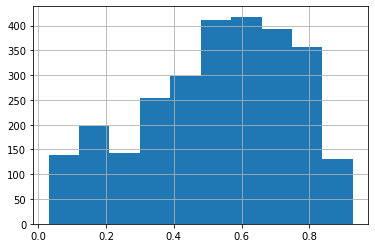

In [14]:
data['qed'].hist()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 18000x18000 with 0 Axes>

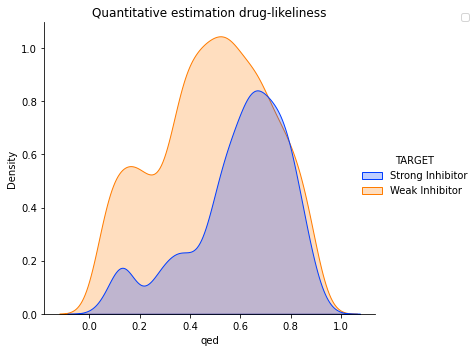

In [33]:
plt.figure(figsize=(15, 15),dpi=1200)
sns.displot(data=data, x='qed', hue='TARGET', kind='kde', fill=True, palette=sns.color_palette('bright')[:2])
plt.title('Quantitative estimation drug-likeliness')
plt.legend(bbox_to_anchor=(1.3, 1.05))
plt.tight_layout()
plt.savefig('.\images\QED.png')

<Figure size 432x288 with 0 Axes>

# TPSA

<AxesSubplot:>

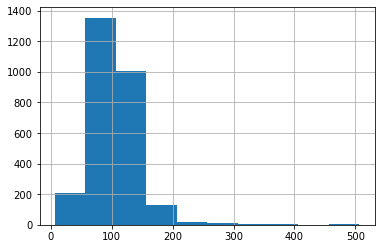

In [10]:
data['TPSA'].hist()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 8400x8400 with 0 Axes>

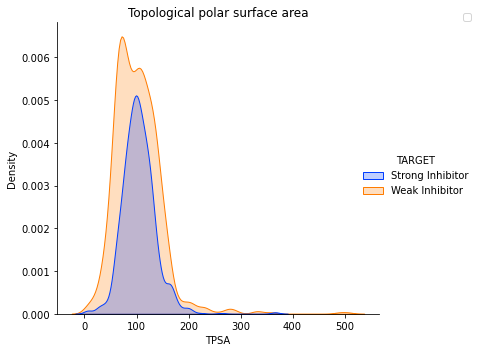

In [34]:
plt.figure(figsize=(7,7),dpi=1200)
sns.displot(data=data, x='TPSA', hue='TARGET', kind='kde', fill=True, palette=sns.color_palette('bright')[:2])
plt.legend(loc='upper right')
plt.title('Topological polar surface area')
plt.legend(bbox_to_anchor=(1.3, 1.05))
plt.tight_layout()
plt.savefig('.\images\TPSA.png')

# MOLMR

<AxesSubplot:>

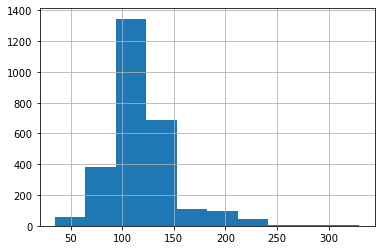

In [17]:
data['MolMR'].hist()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 8400x8400 with 0 Axes>

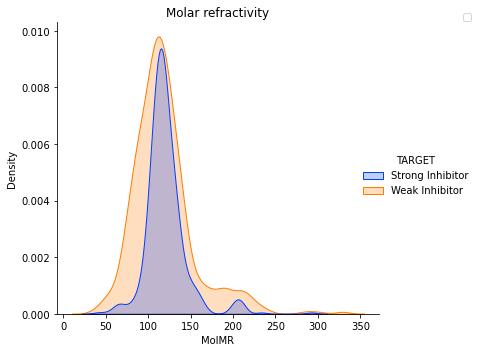

In [35]:
plt.figure(figsize=(7,7),dpi=1200)
sns.displot(data=data, x='MolMR', hue='TARGET', kind='kde', fill=True, palette=sns.color_palette('bright')[:2])
plt.legend(loc='upper right')
plt.title('Molar refractivity')
plt.legend(bbox_to_anchor=(1.3, 1.05))
plt.tight_layout()
plt.savefig('.\images\MolMR.png')

# MolLogP

<AxesSubplot:>

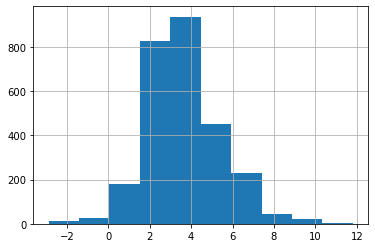

In [20]:
data['MolLogP'].hist()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 8400x8400 with 0 Axes>

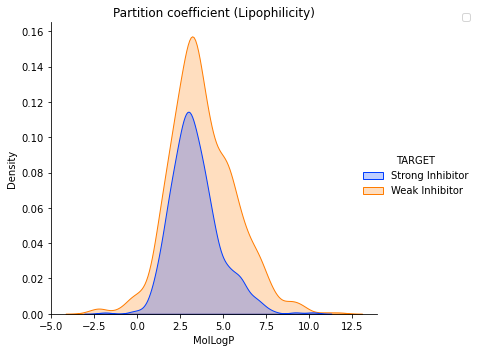

In [36]:
plt.figure(figsize=(7,7),dpi=1200)
sns.displot(data=data, x='MolLogP', hue='TARGET', kind='kde', fill=True, palette=sns.color_palette('bright')[:2])
plt.legend(loc='upper right')
plt.title('Partition coefficient (Lipophilicity)')
plt.legend(bbox_to_anchor=(1.3, 1.05))
plt.tight_layout()
plt.savefig('.\images\MolLogP.png')

# ExactMolWt

<AxesSubplot:>

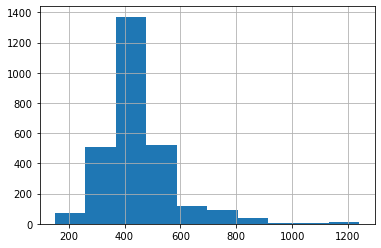

In [23]:
data['ExactMolWt'].hist()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 8400x8400 with 0 Axes>

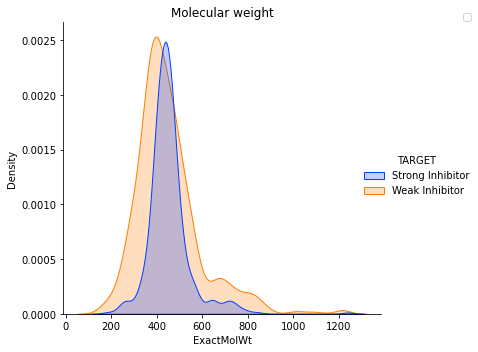

In [37]:
plt.figure(figsize=(7,7),dpi=1200)
sns.displot(data=data, x='ExactMolWt', hue='TARGET', kind='kde', fill=True, palette=sns.color_palette('bright')[:2])
plt.legend(loc='upper right')
plt.title('Molecular weight')
plt.legend(bbox_to_anchor=(1.3, 1.05))
plt.tight_layout()
plt.savefig('.\images\MolWt.png')

# FractionCSP3

<AxesSubplot:>

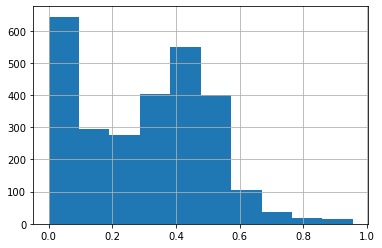

In [26]:
data['FractionCSP3'].hist()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 8400x8400 with 0 Axes>

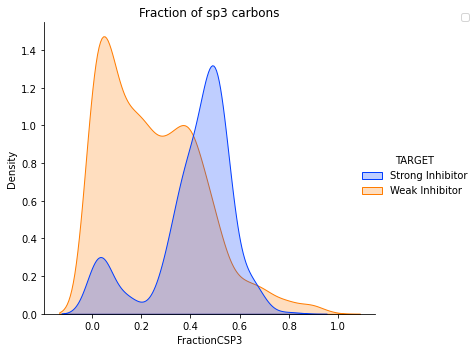

In [38]:
plt.figure(figsize=(7,7), dpi=1200)
sns.displot(data=data, x='FractionCSP3', hue='TARGET', kind='kde', fill=True, palette=sns.color_palette('bright')[:2])
plt.legend(loc='upper right')
plt.title('Fraction of sp3 carbons')
plt.legend(bbox_to_anchor=(1.3, 1.05))
plt.tight_layout()
plt.savefig('.\images\FractionSP3.png')

# RingCount

In [29]:
data['RingCount'].value_counts()

4     859
3     698
5     526
2     262
6     248
7      65
1      46
8      17
9       8
0       8
12      4
Name: RingCount, dtype: int64

E:\MY_FILES\Anaconda\envs\thesis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


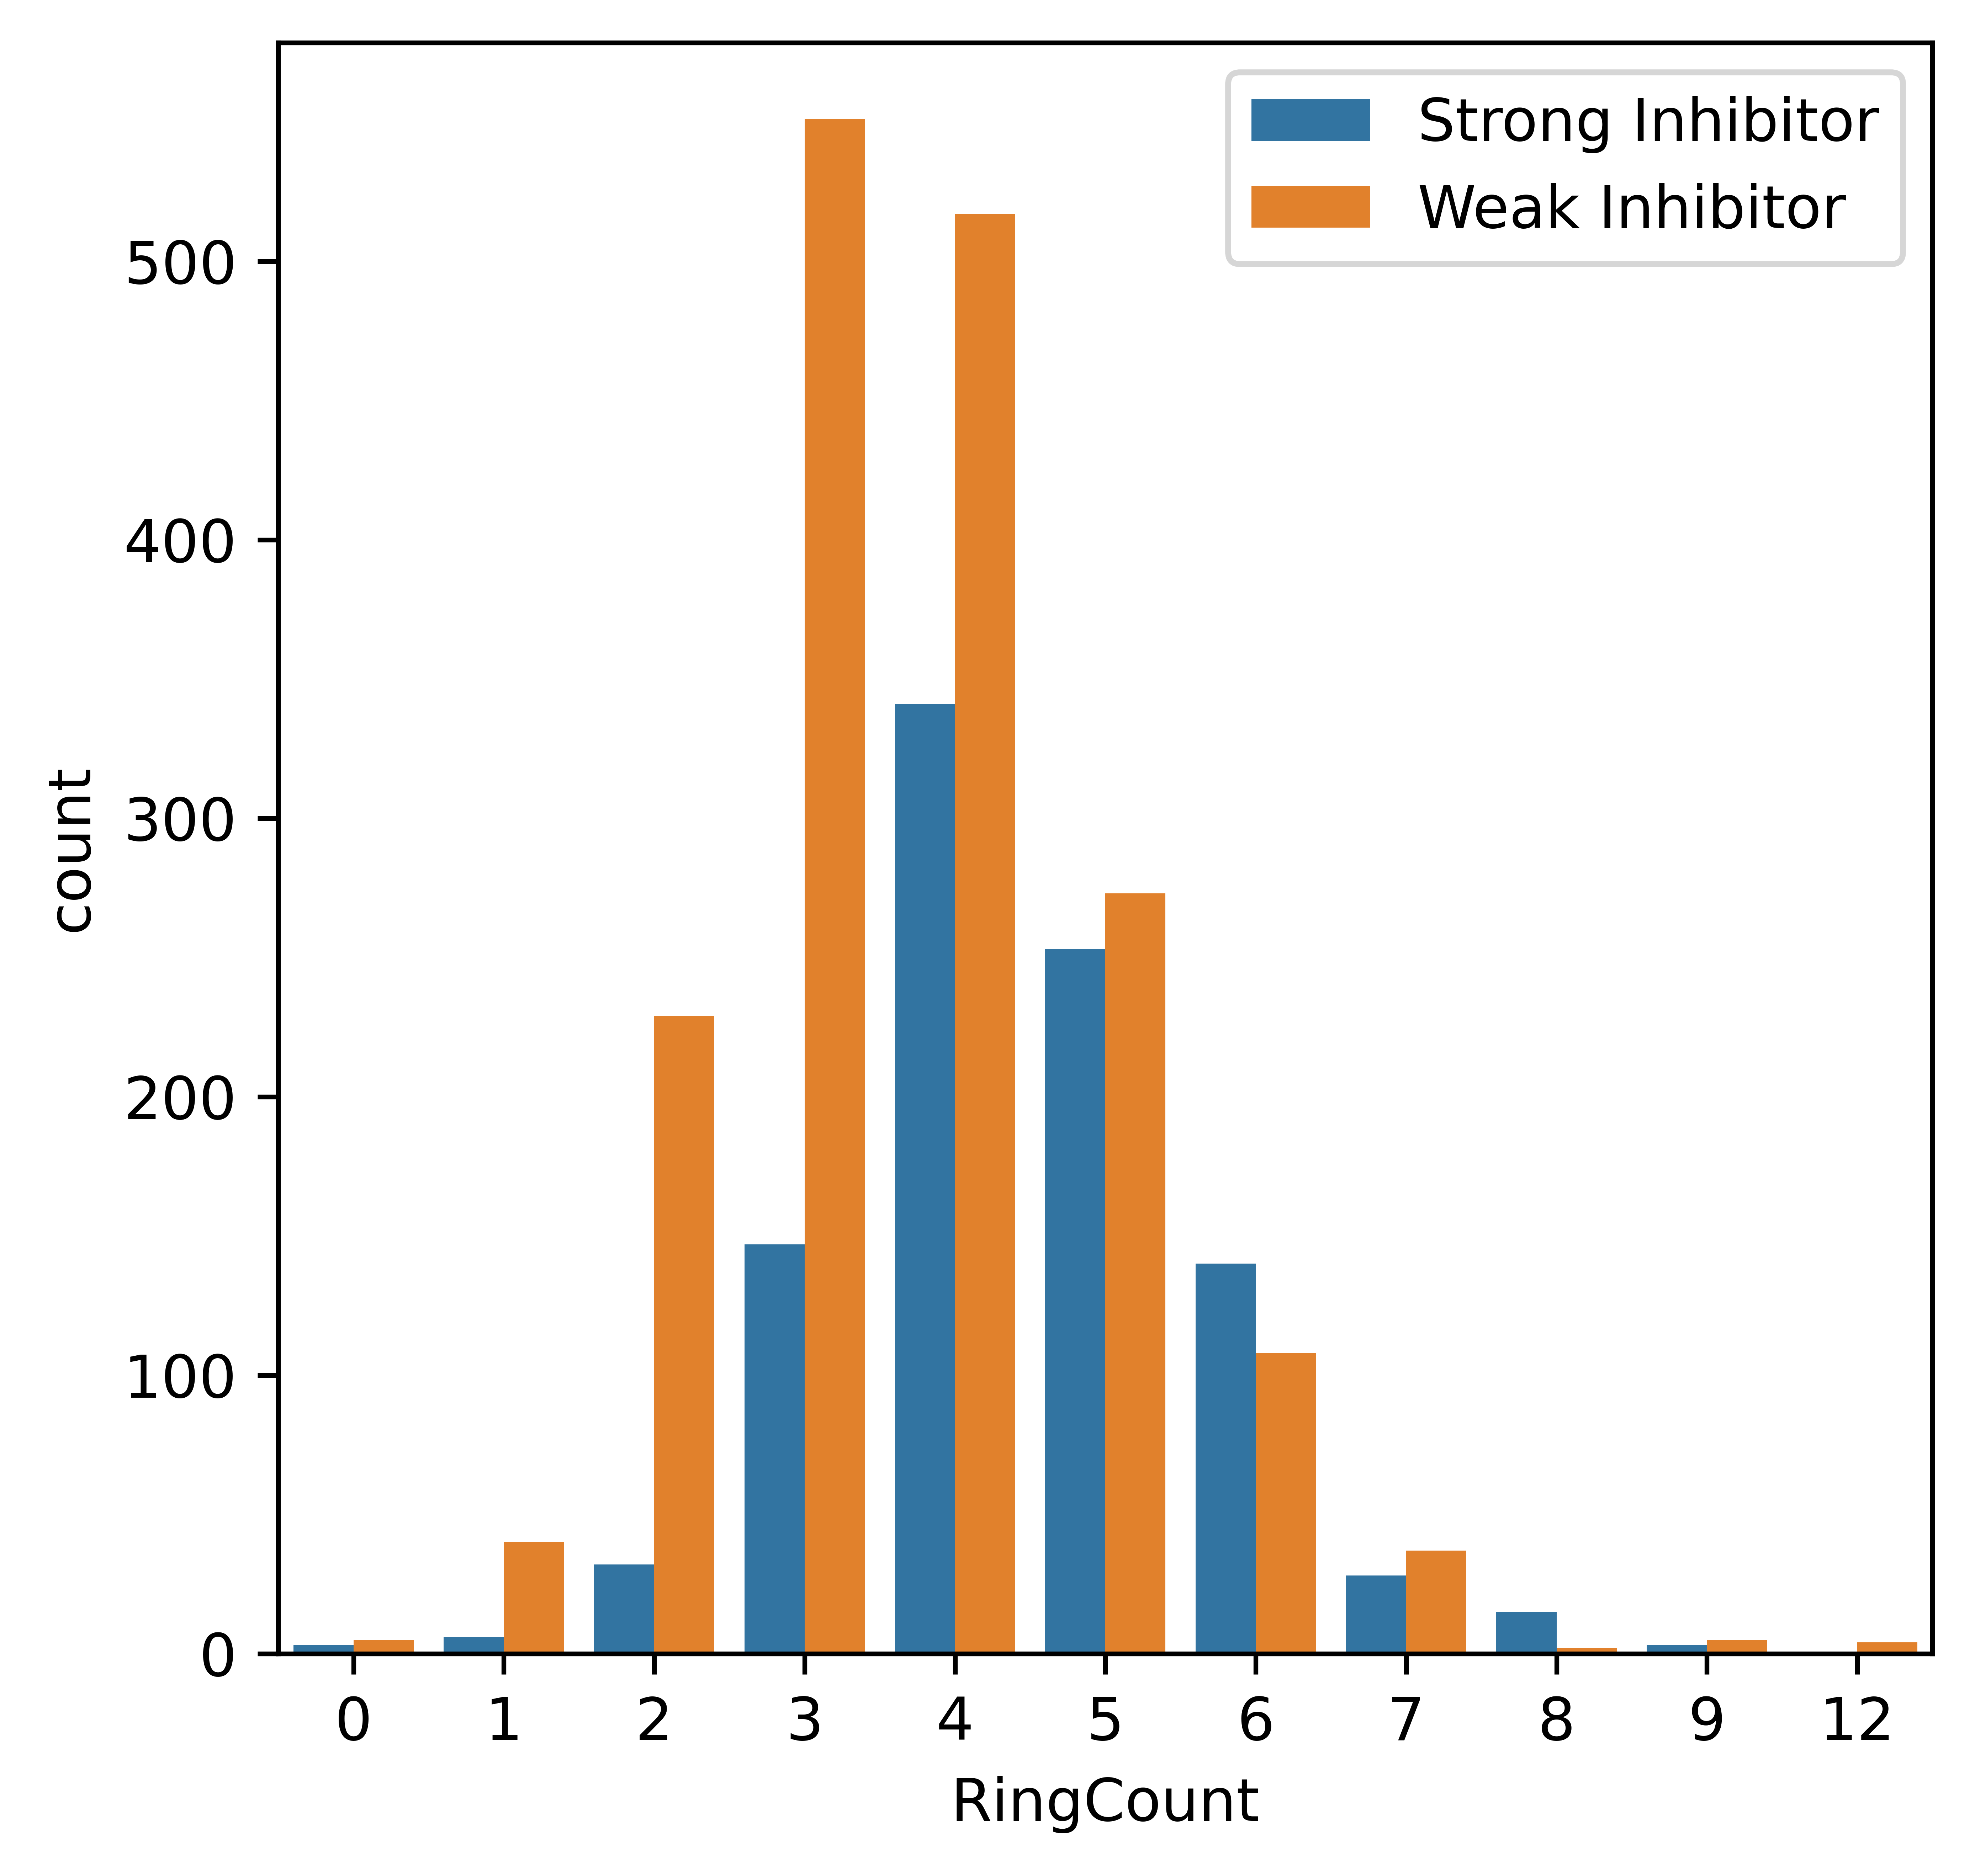

In [39]:
plt.figure(figsize=(5,5), dpi=1200)
sns.countplot(data['RingCount'], hue=data['TARGET'])
plt.legend(loc='upper right')
plt.savefig('.\images\RingCount.png')

# NumAromaticRings

In [32]:
data['NumAromaticRings'].value_counts()

2     1235
3      718
4      285
5      212
1      148
6       79
0       46
7        8
8        6
10       4
Name: NumAromaticRings, dtype: int64

E:\MY_FILES\Anaconda\envs\thesis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


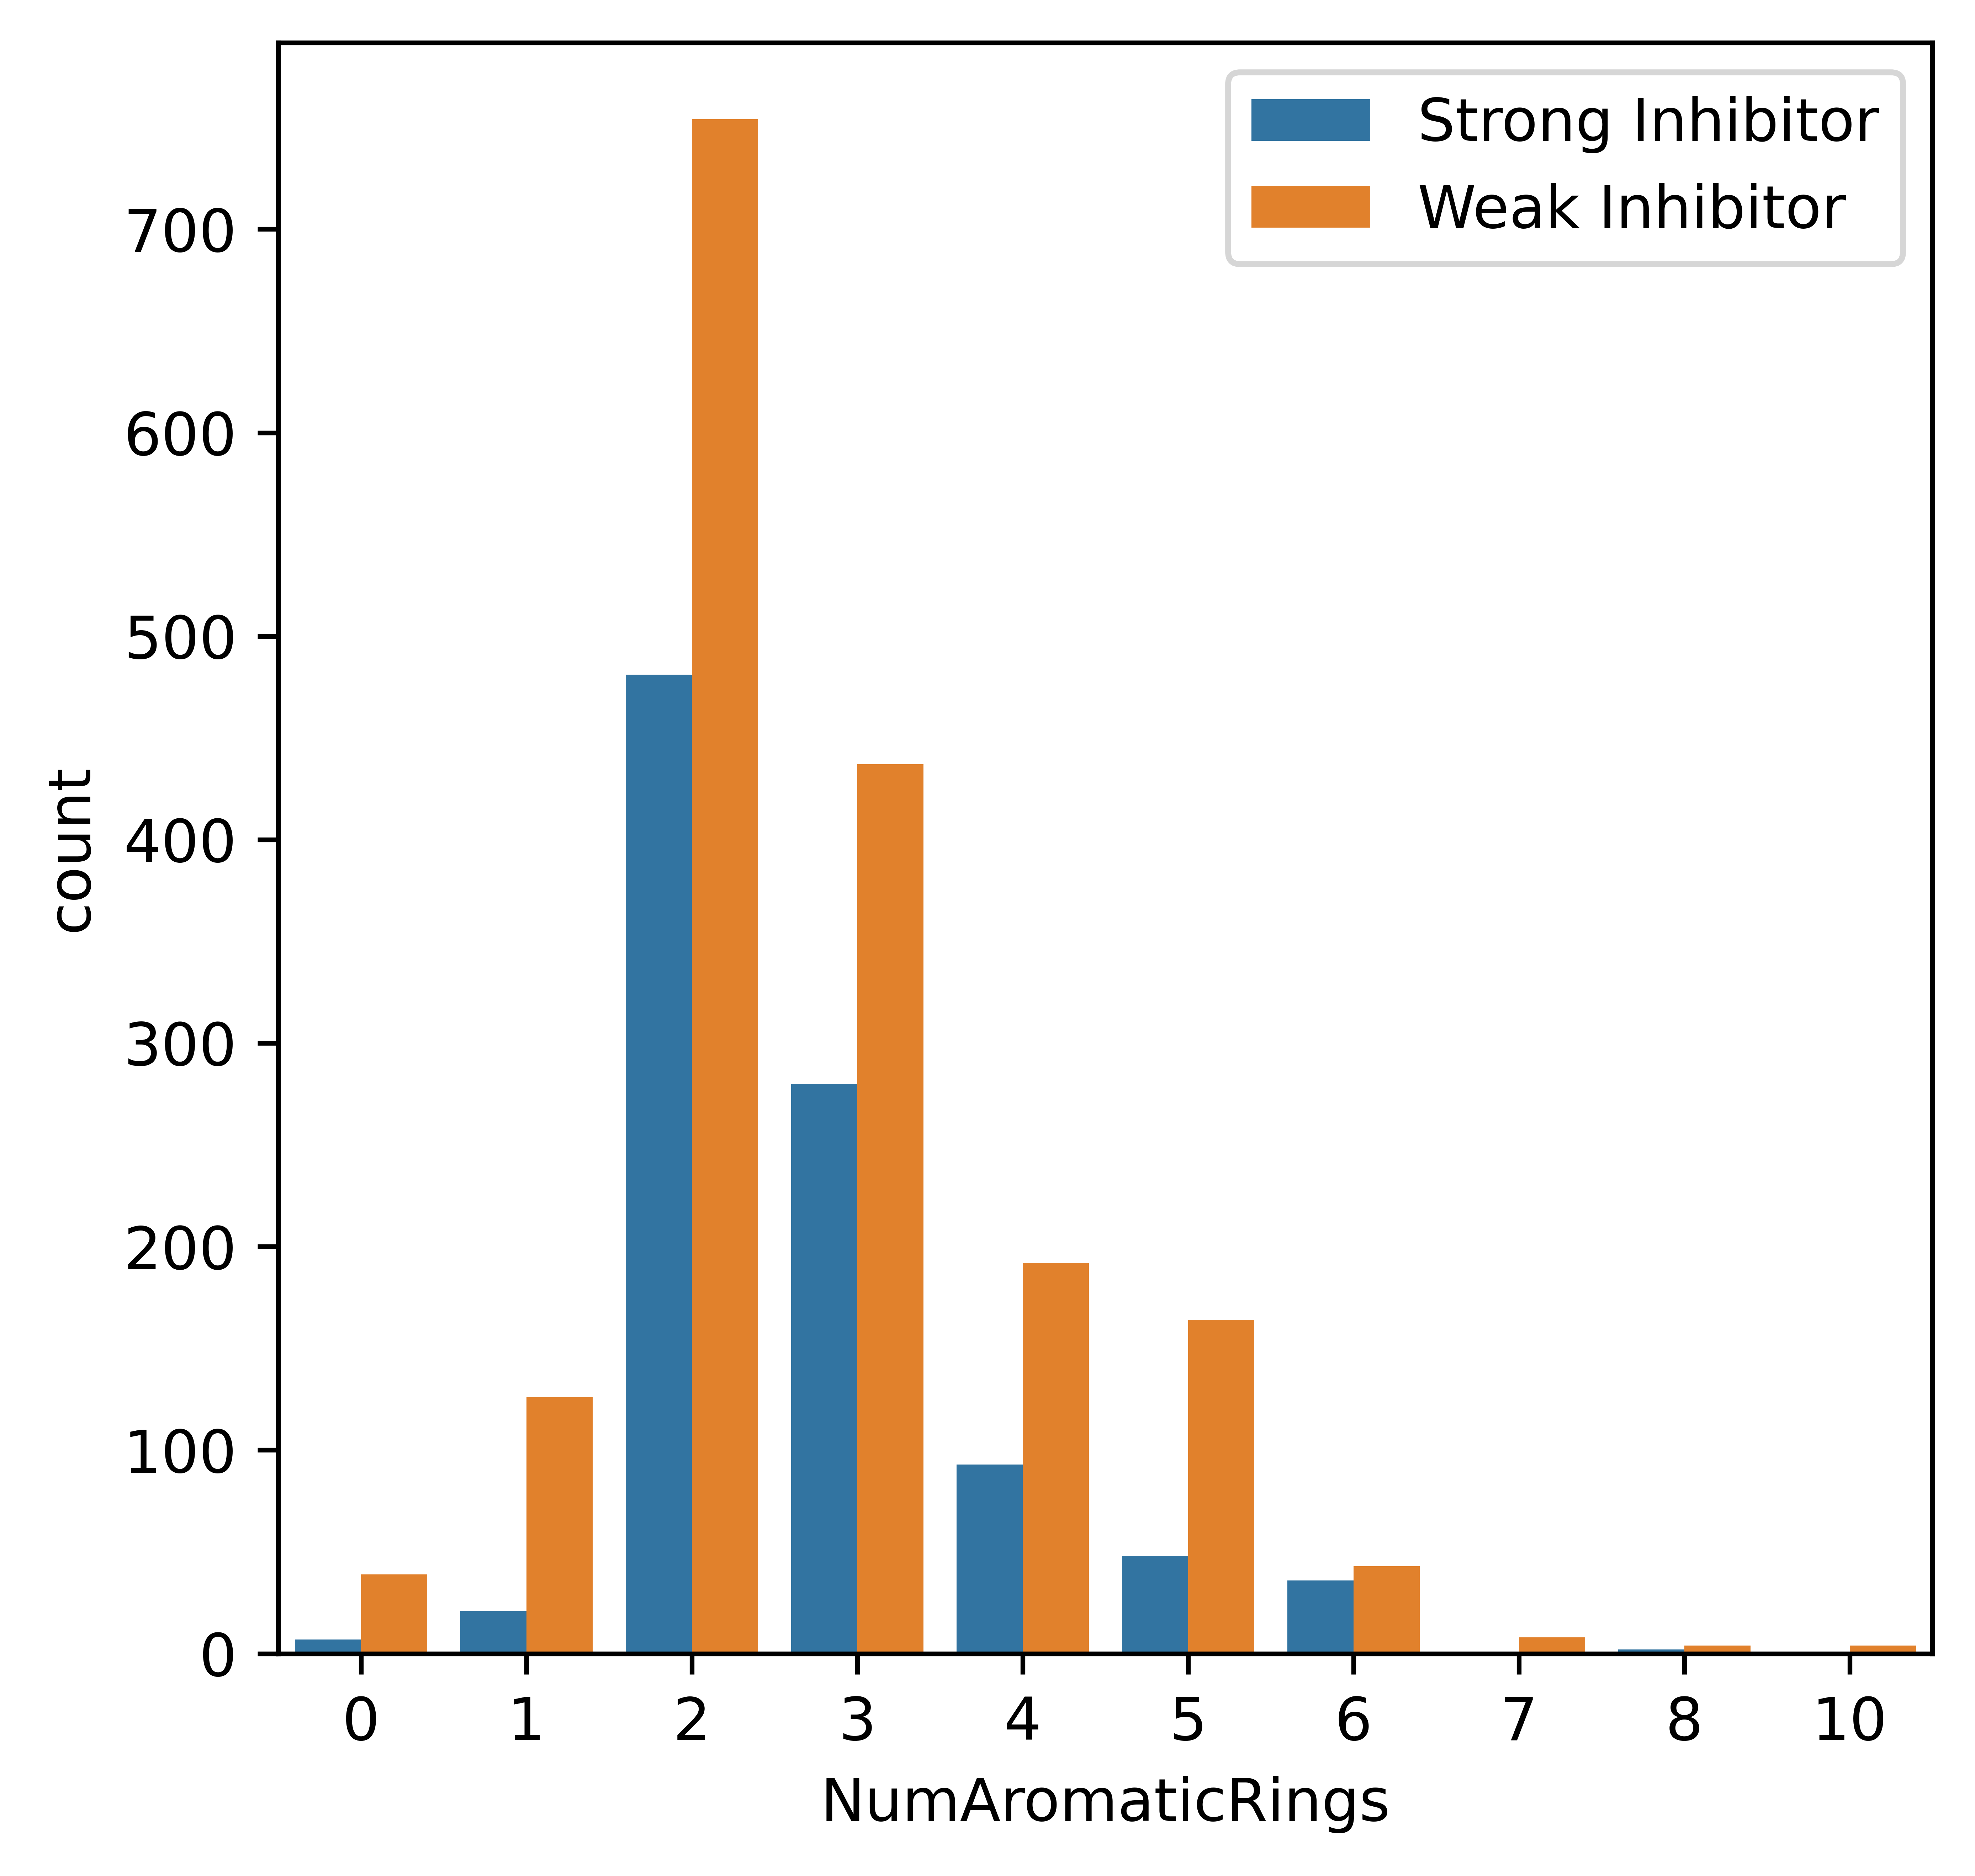

In [41]:
plt.figure(figsize=(5,5),dpi=1200)
sns.countplot(data['NumAromaticRings'], hue=data['TARGET'])
plt.legend(loc='upper right')
plt.savefig(r'.\images\NumAromaticRings.png')

# NumAliphaticRings

In [35]:
data['NumAliphaticRings'].value_counts()

1    904
2    831
0    801
3     92
4     74
5     36
6      2
9      1
Name: NumAliphaticRings, dtype: int64

E:\MY_FILES\Anaconda\envs\thesis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


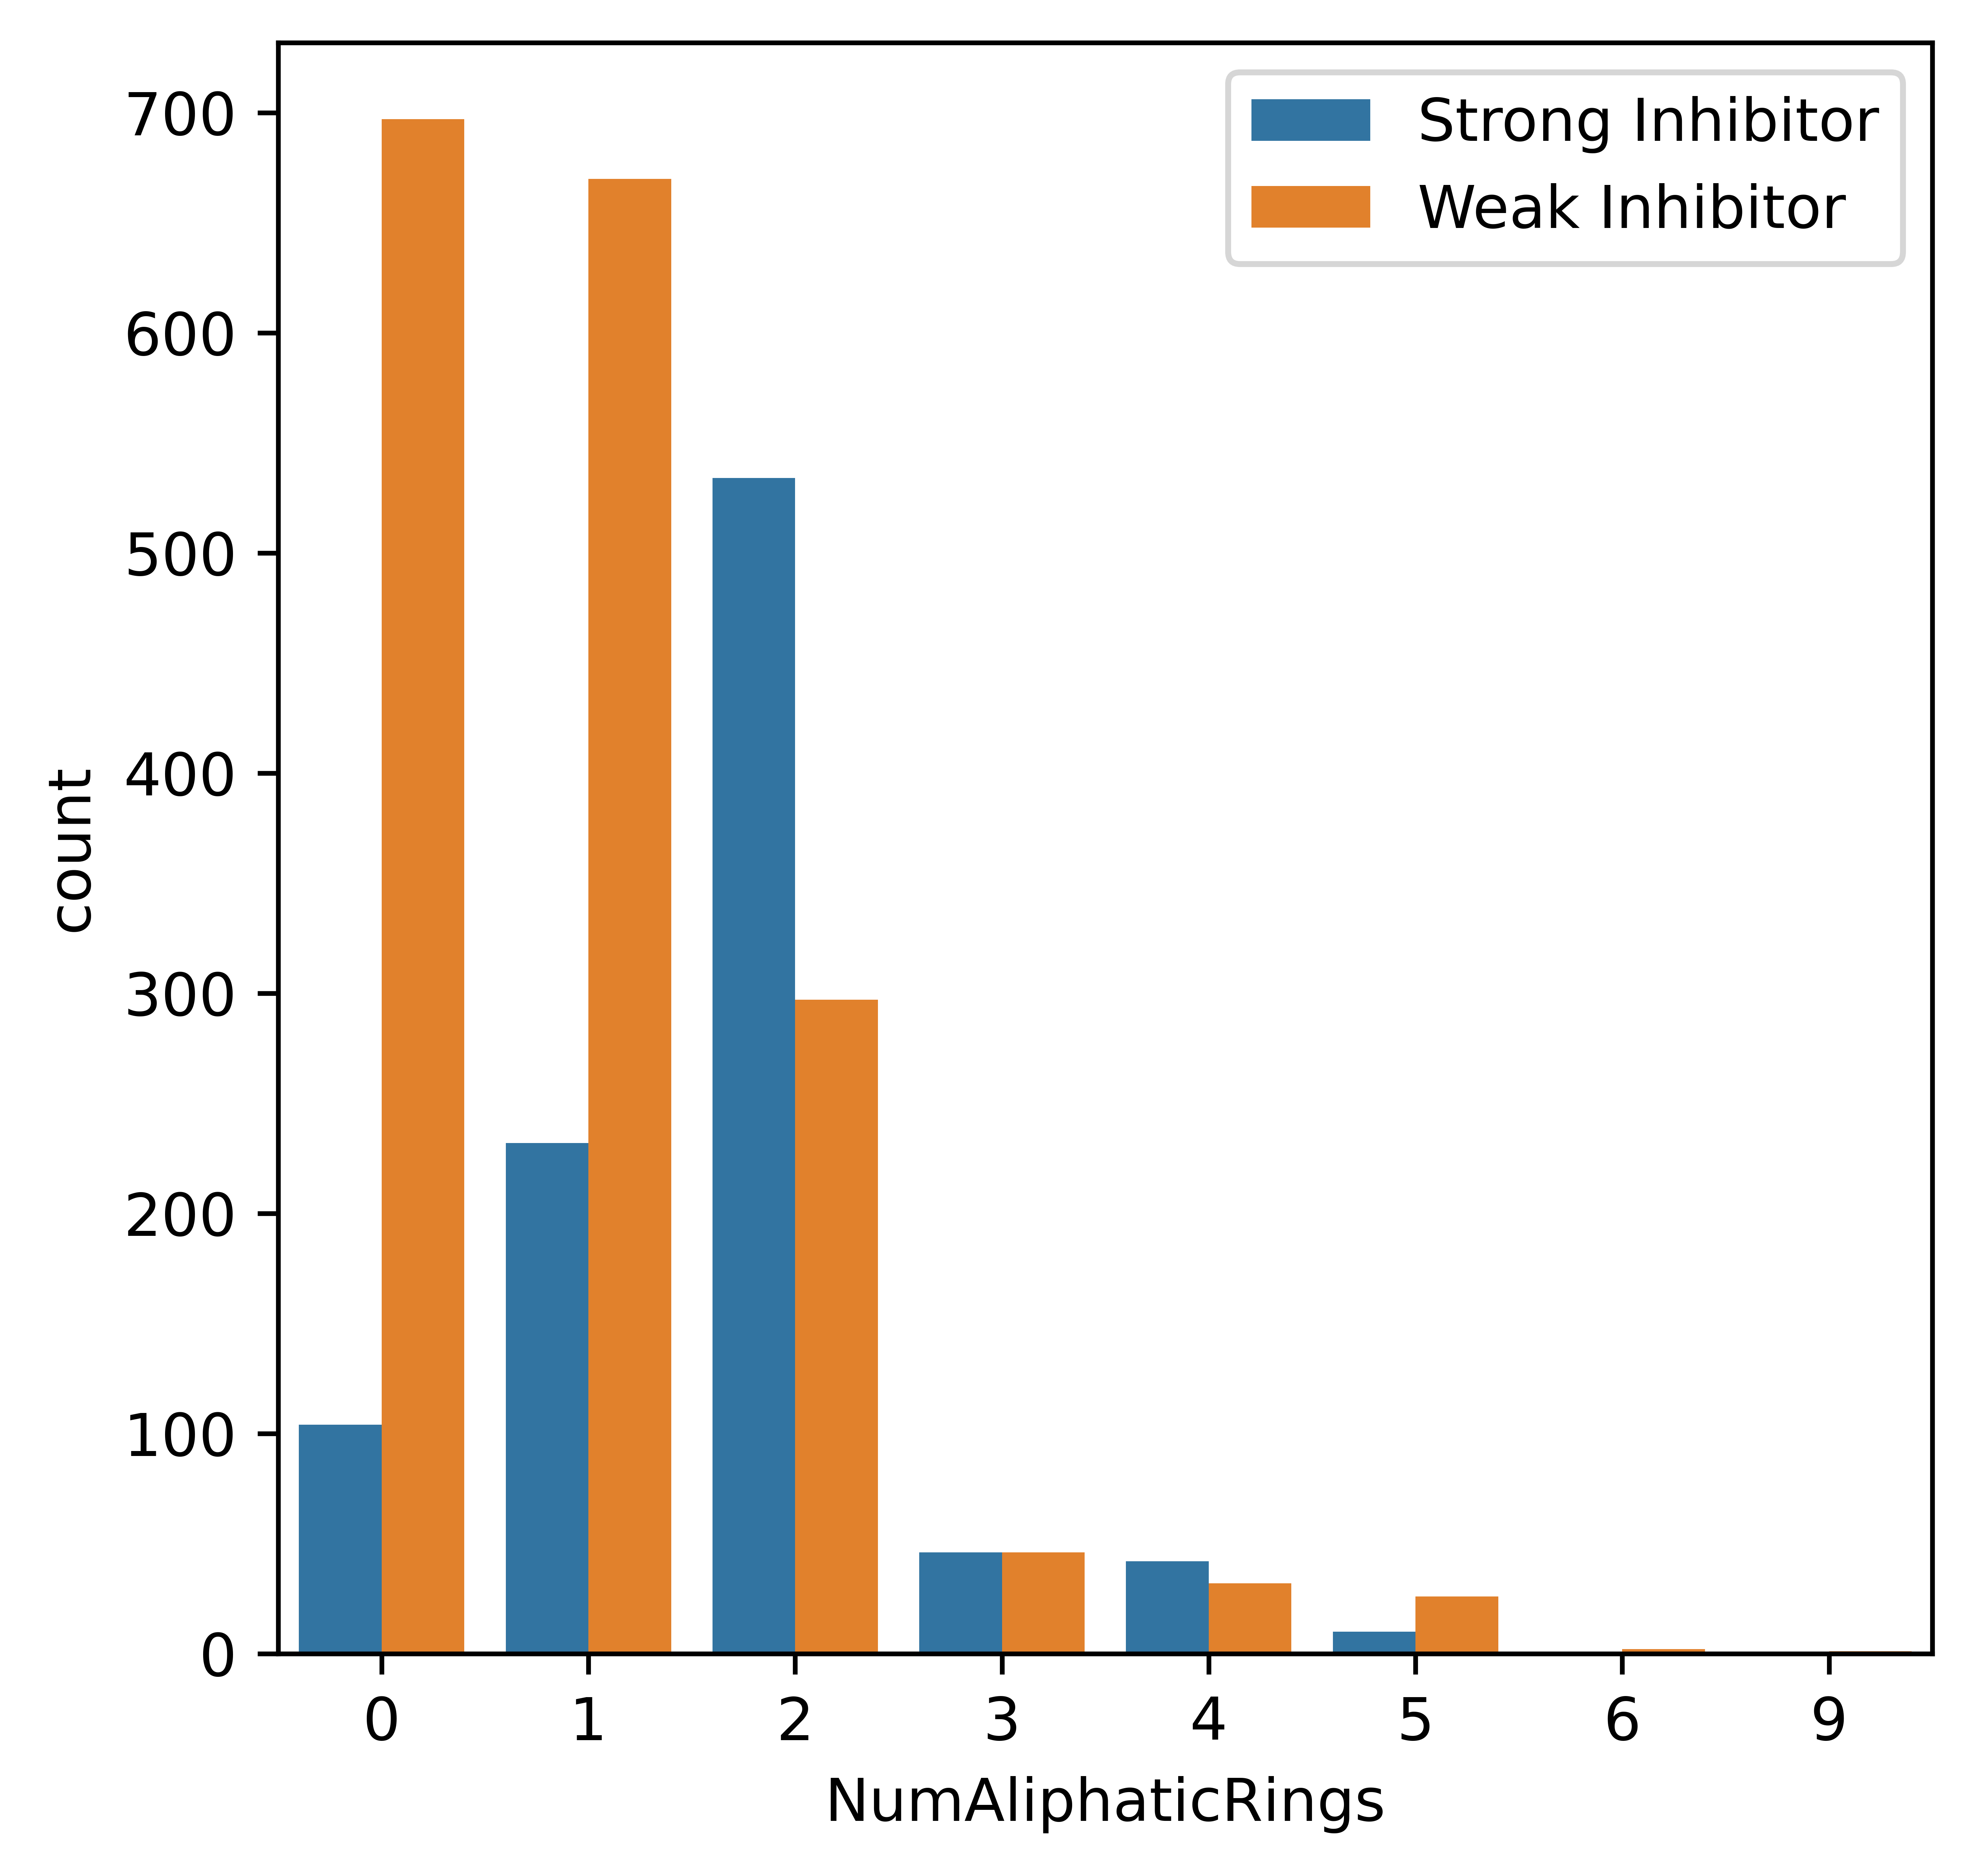

In [42]:
plt.figure(figsize=(5,5), dpi=1200)
sns.countplot(data['NumAliphaticRings'], hue=data['TARGET'])
plt.legend(loc='upper right')
plt.savefig(r'.\images\NumAliphaticRings.png')

# NumSaturatedRings

In [38]:
data['NumSaturatedRings'].value_counts()

0    1185
1     790
2     625
3      95
4      44
8       1
5       1
Name: NumSaturatedRings, dtype: int64

E:\MY_FILES\Anaconda\envs\thesis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


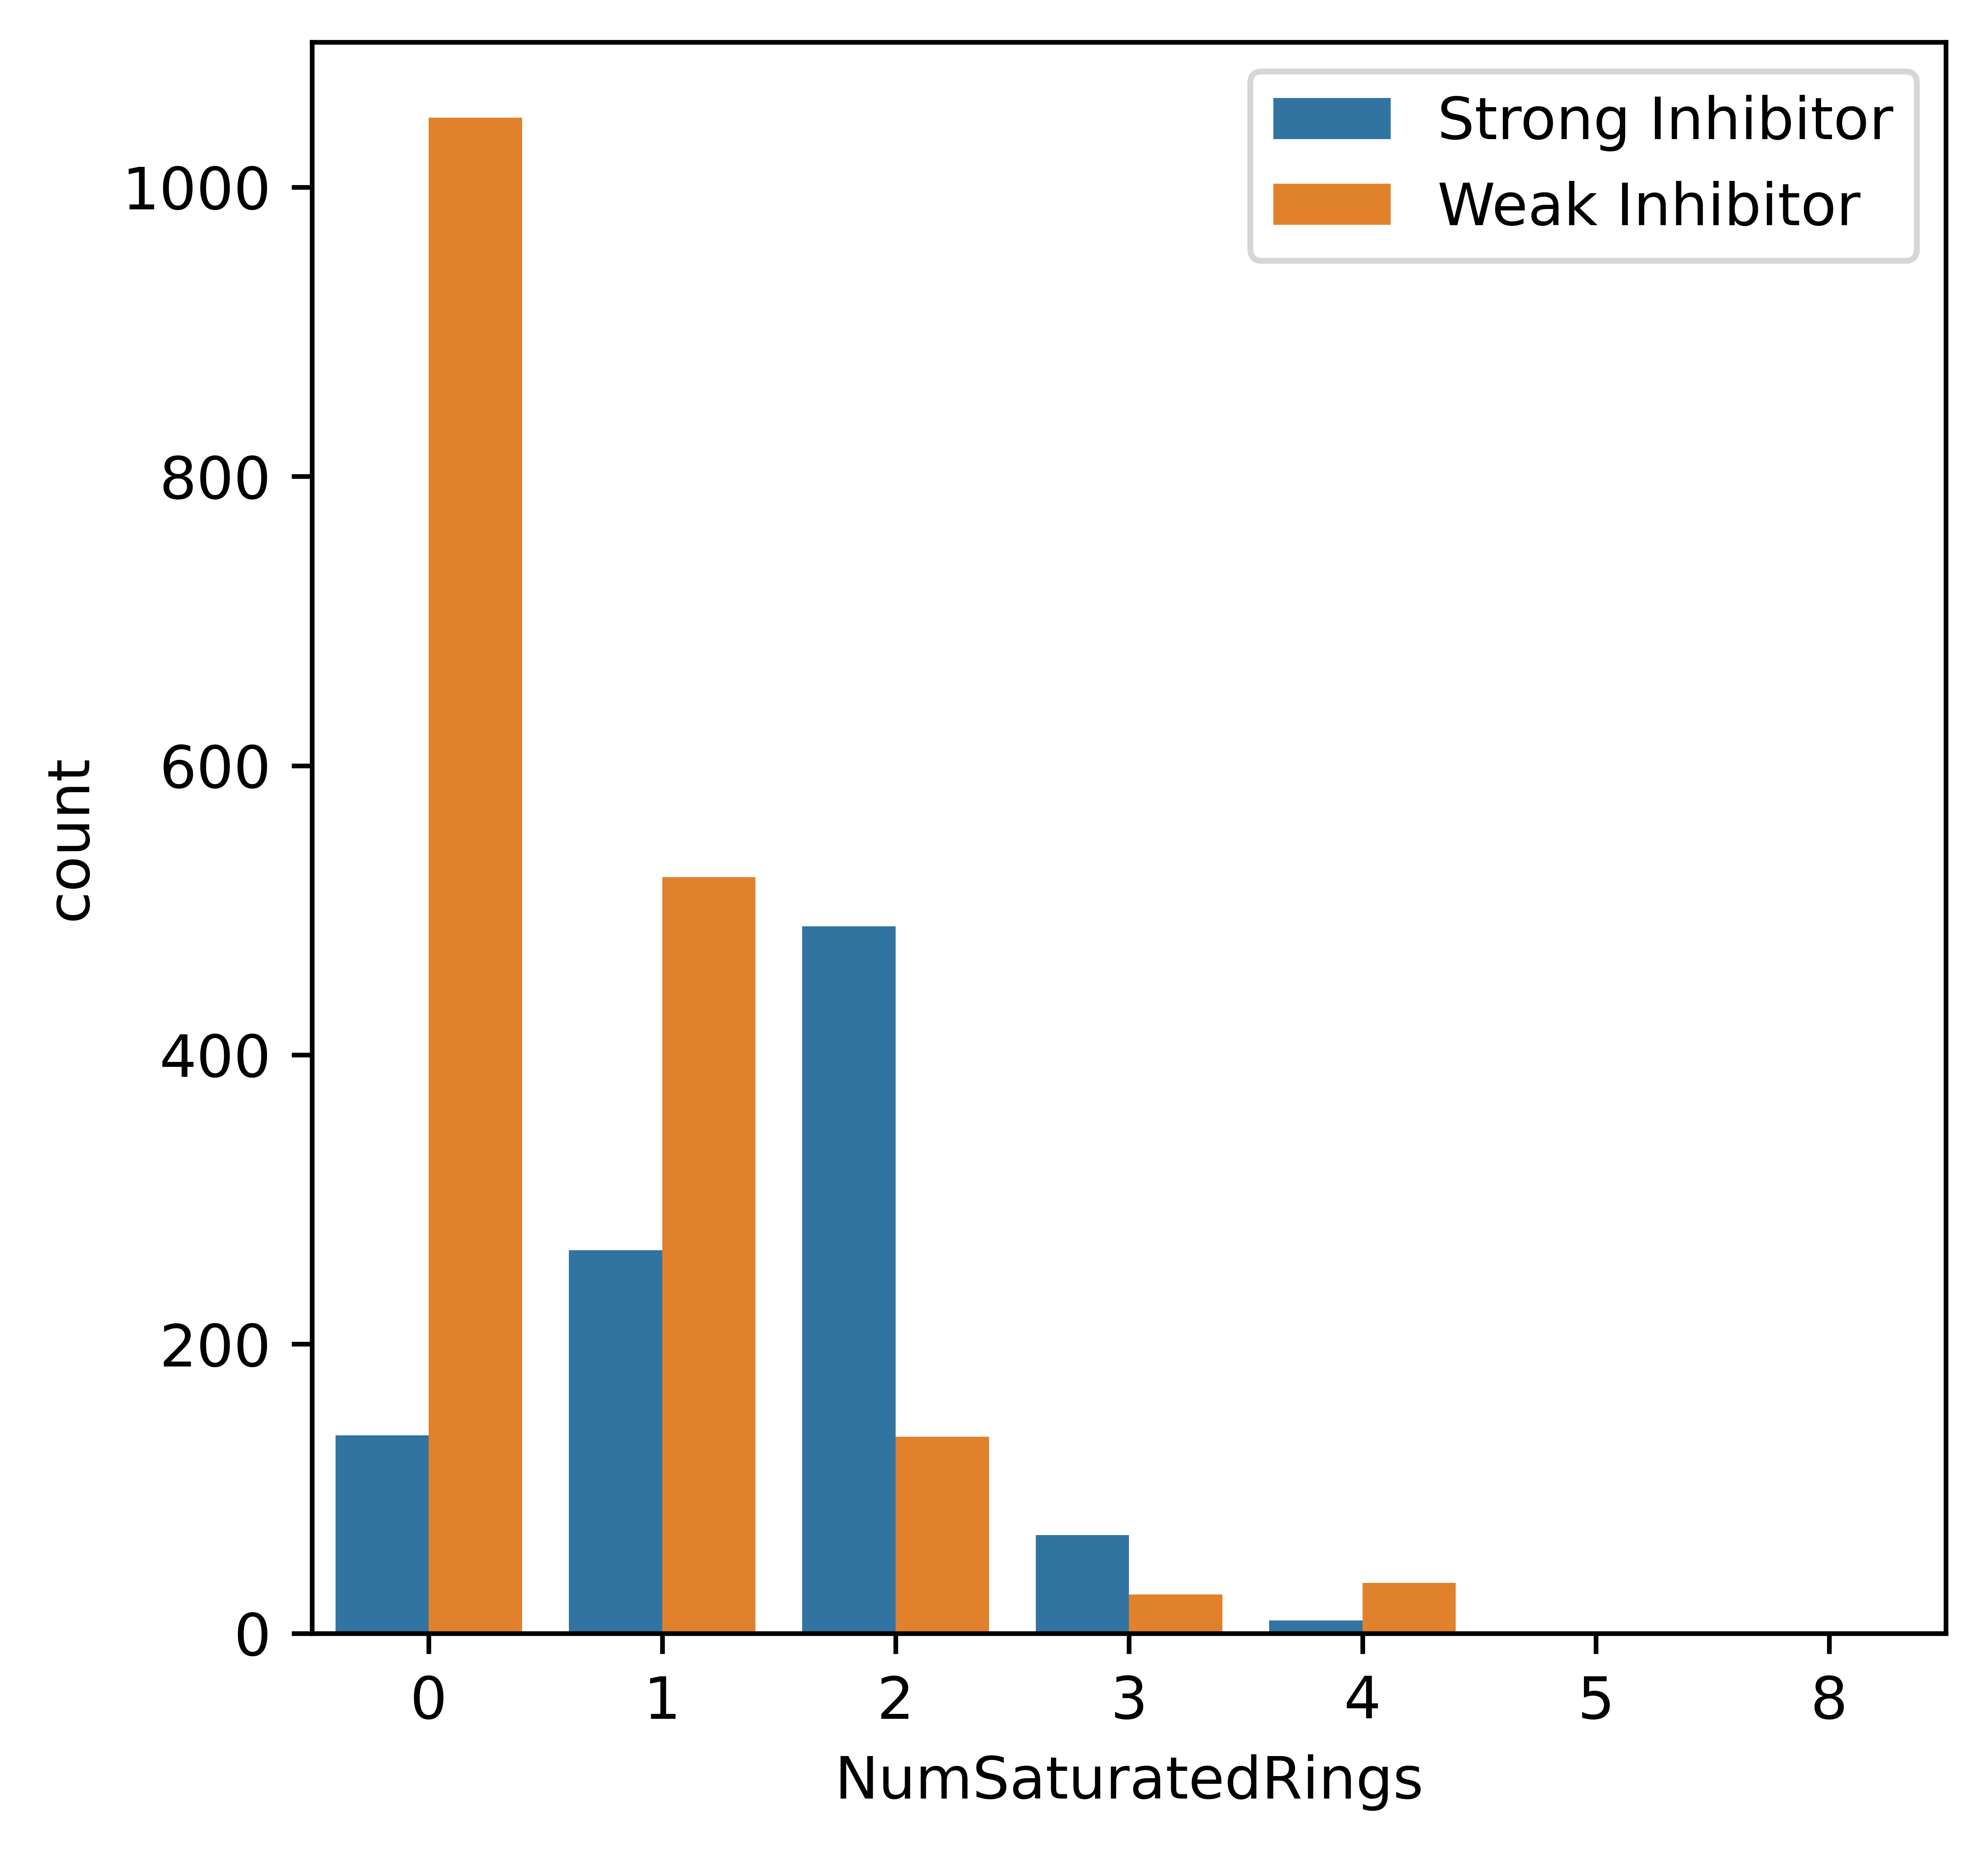

In [43]:
plt.figure(figsize=(5,5),dpi=1200)
sns.countplot(data['NumSaturatedRings'], hue=data['TARGET'])
plt.legend(loc='upper right')
plt.savefig(r'.\images\NumSaturatedRings.png')

# NumAromaticCarbocycles

E:\MY_FILES\Anaconda\envs\thesis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


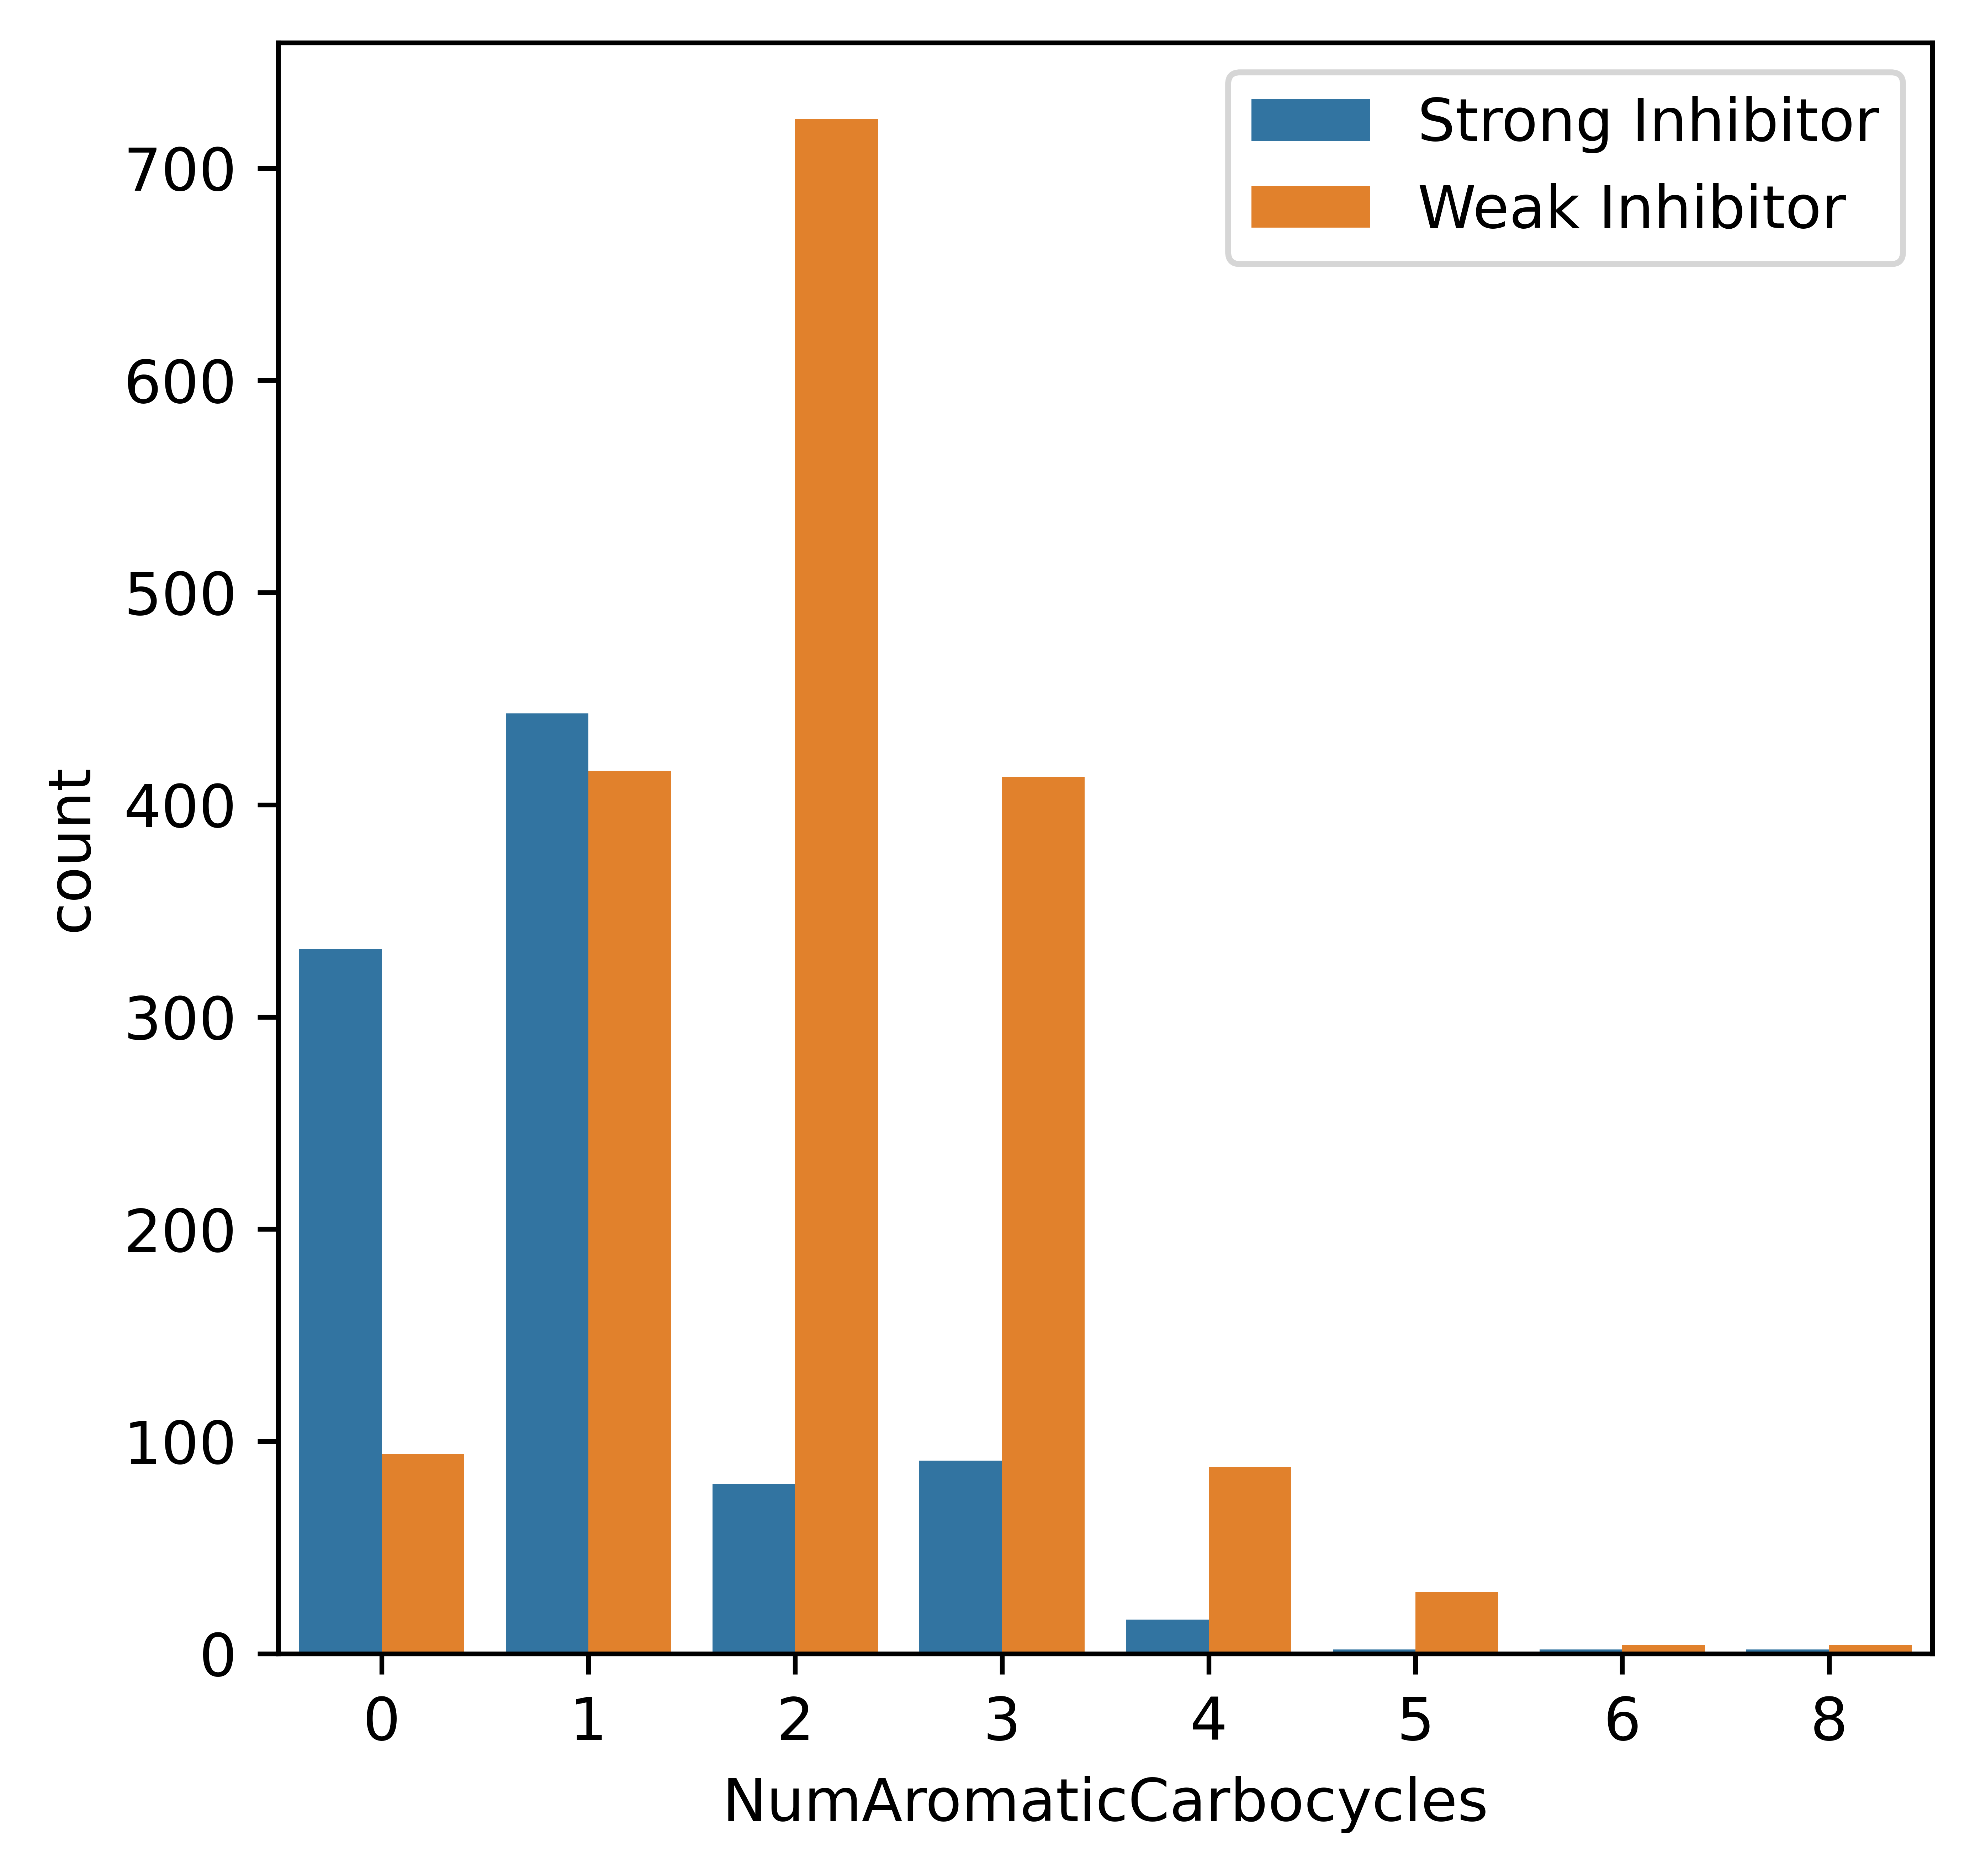

In [44]:
plt.figure(figsize=(5,5),dpi=1200)
sns.countplot(data['NumAromaticCarbocycles'], hue=data['TARGET'])
plt.legend(loc='upper right')
plt.savefig(r'.\images\NumAromaticCarbocycles.png')

# NumAliphaticCarbocycles

E:\MY_FILES\Anaconda\envs\thesis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


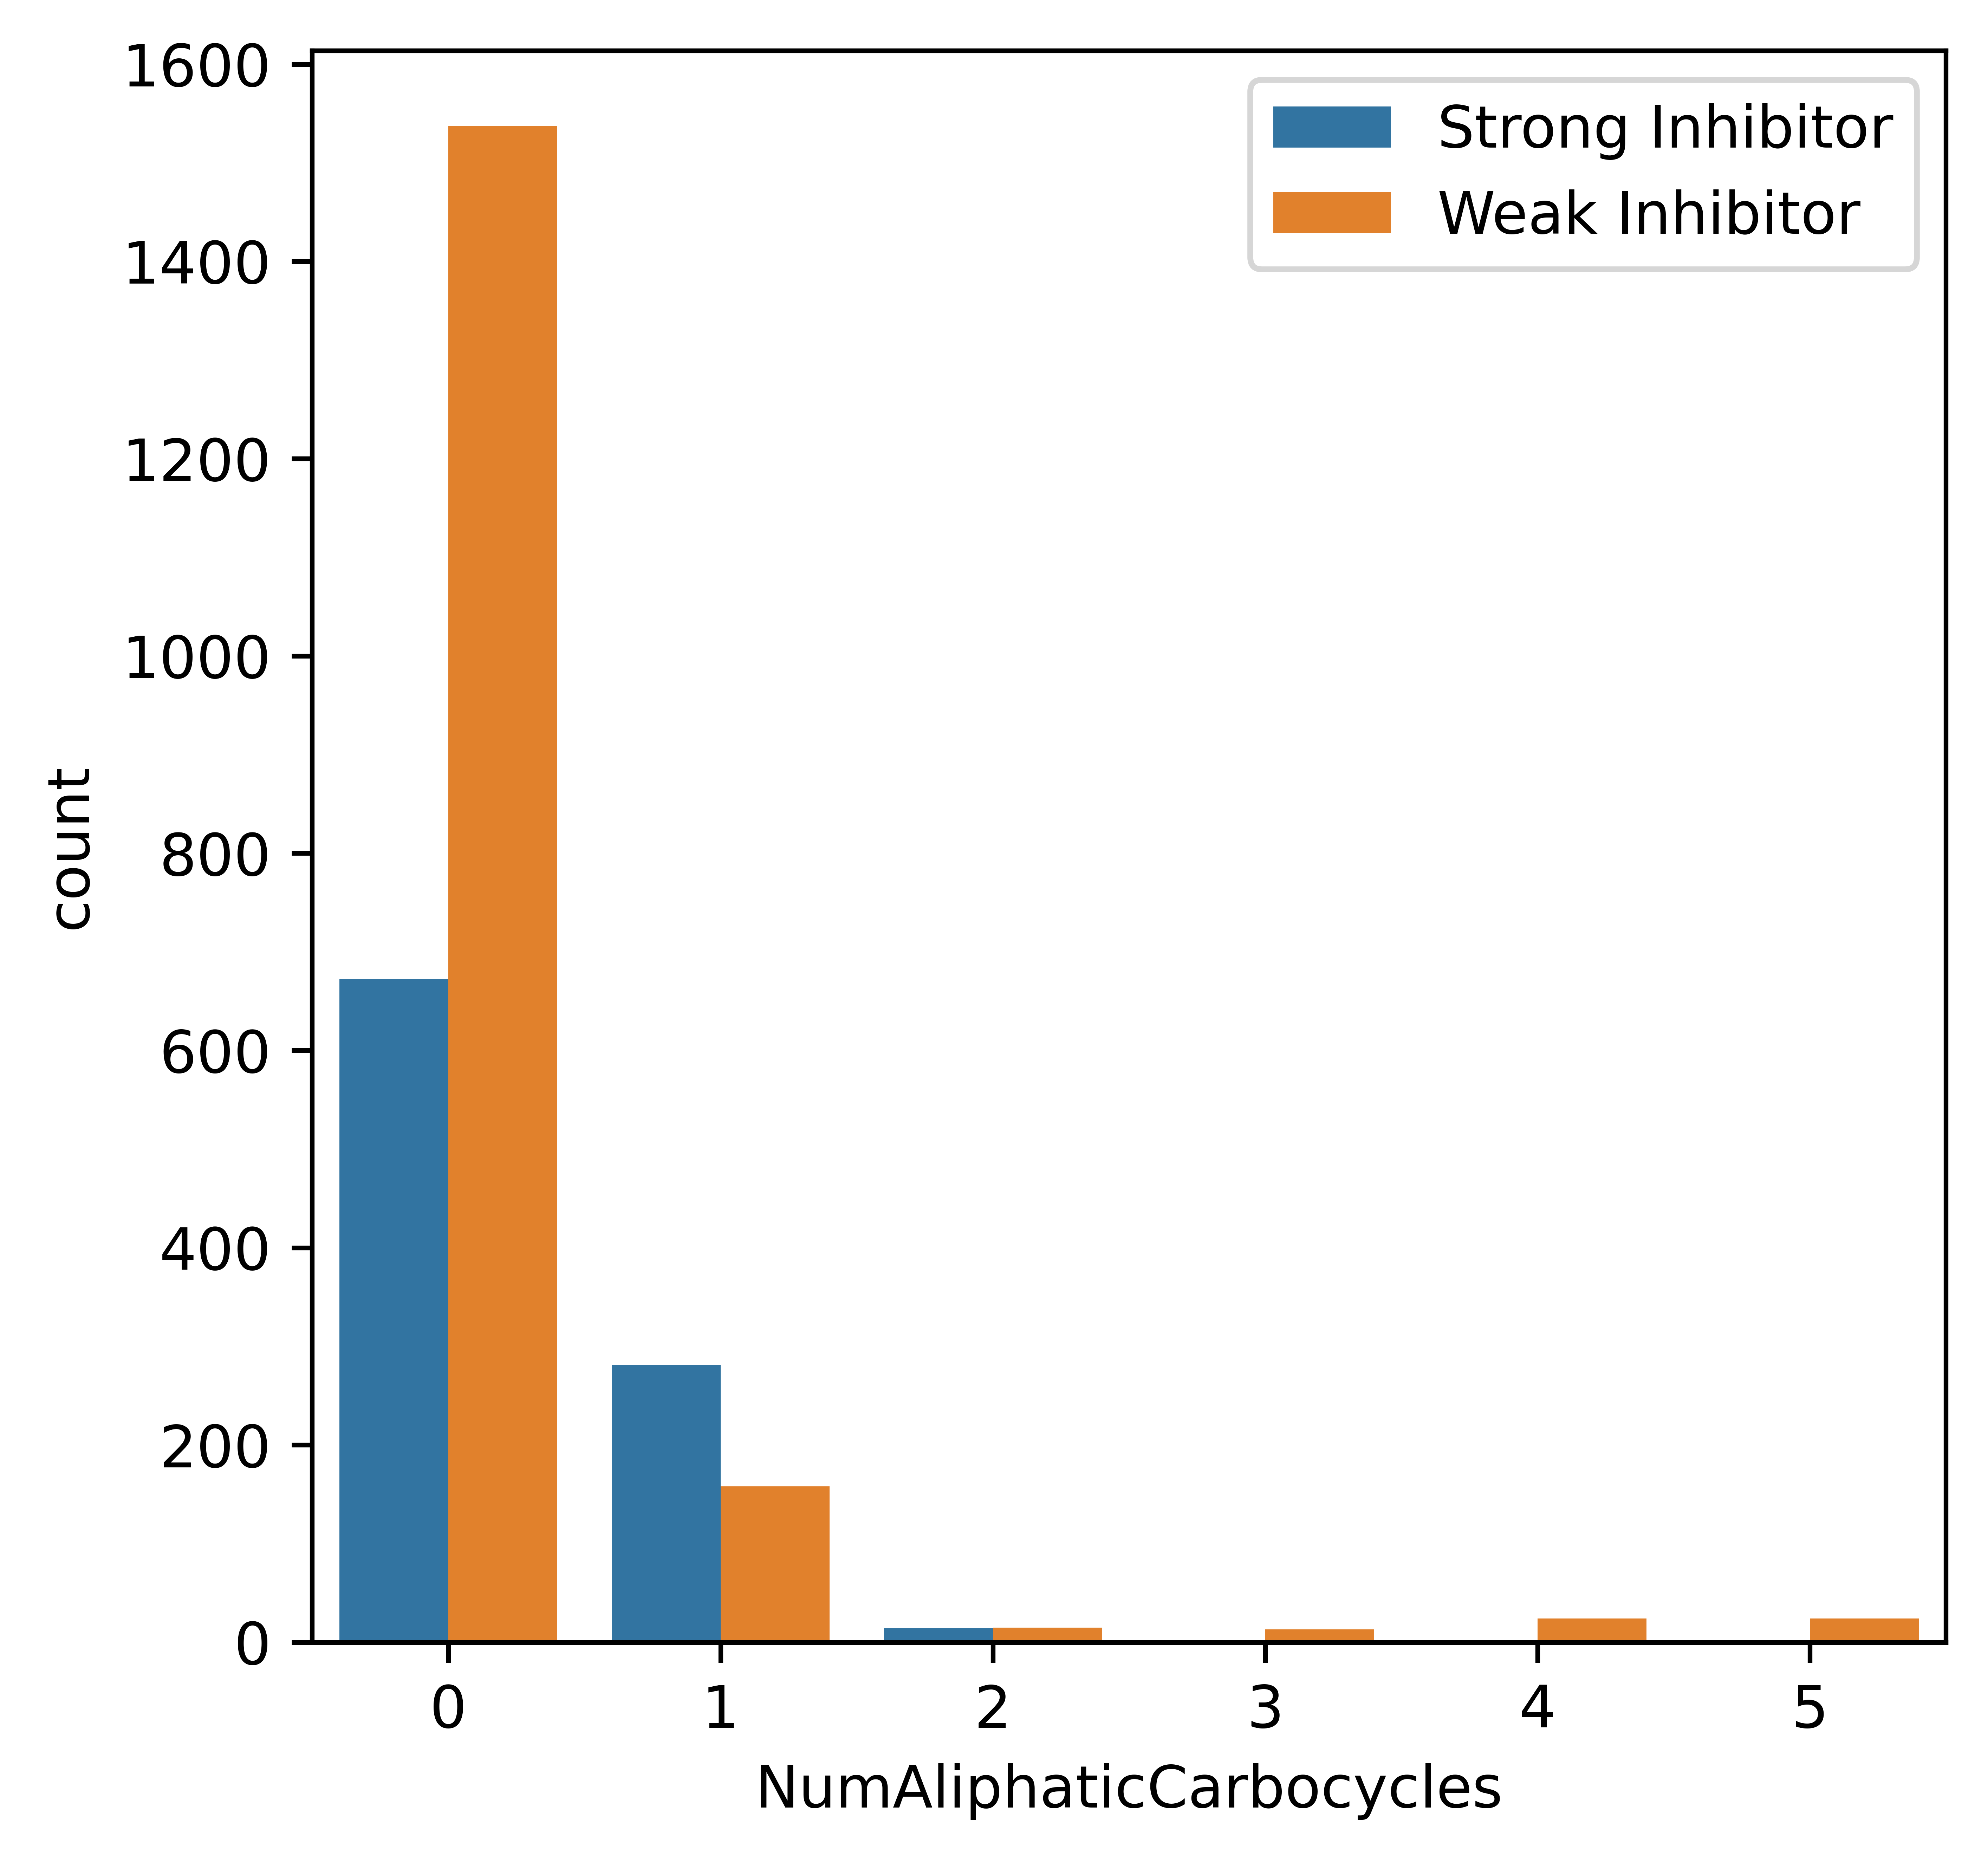

In [45]:
plt.figure(figsize=(5,5),dpi=1200)
sns.countplot(data['NumAliphaticCarbocycles'], hue=data['TARGET'])
plt.legend(loc='upper right')
plt.savefig(r'.\images\NumAliphaticCarbocycles.png')

# NumSaturatedCarbocycles

E:\MY_FILES\Anaconda\envs\thesis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


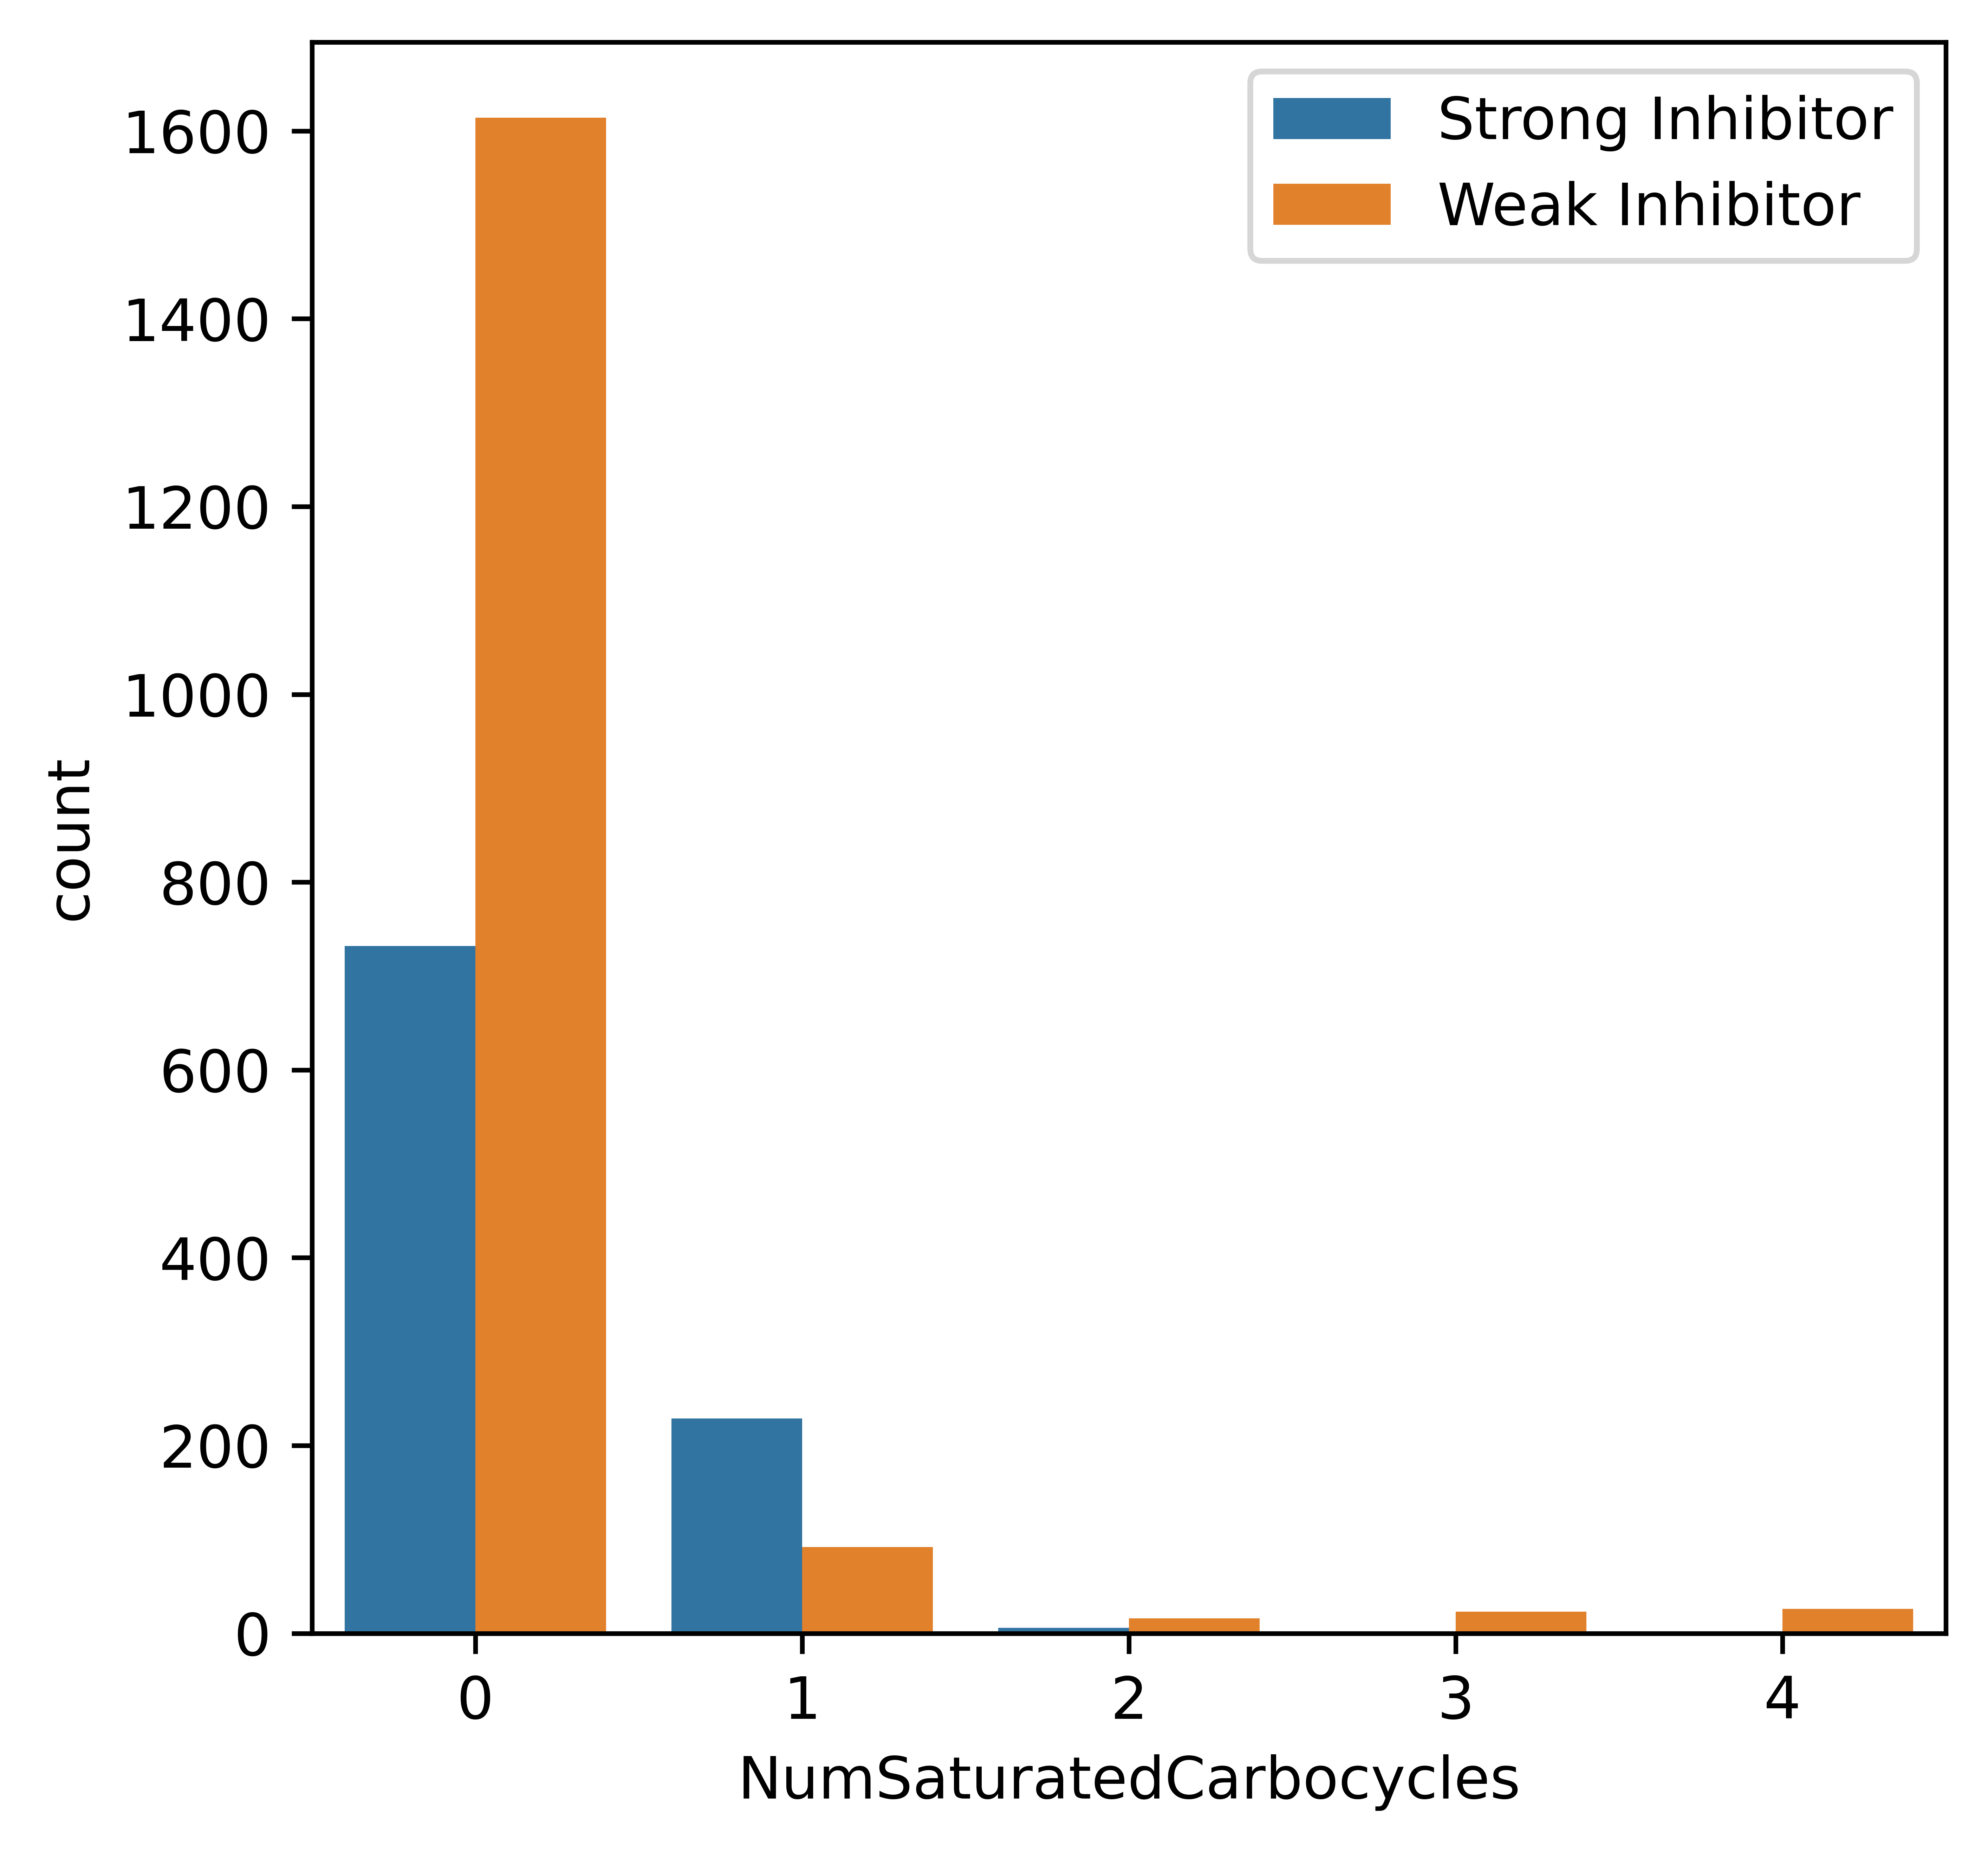

In [46]:
plt.figure(figsize=(5,5),dpi=1200)
sns.countplot(data['NumSaturatedCarbocycles'], hue=data['TARGET'])
plt.legend(loc='upper right')
plt.savefig(r'.\images\NumSaturatedCarbocycles.png')

# NumAromaticHeterocycles

E:\MY_FILES\Anaconda\envs\thesis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


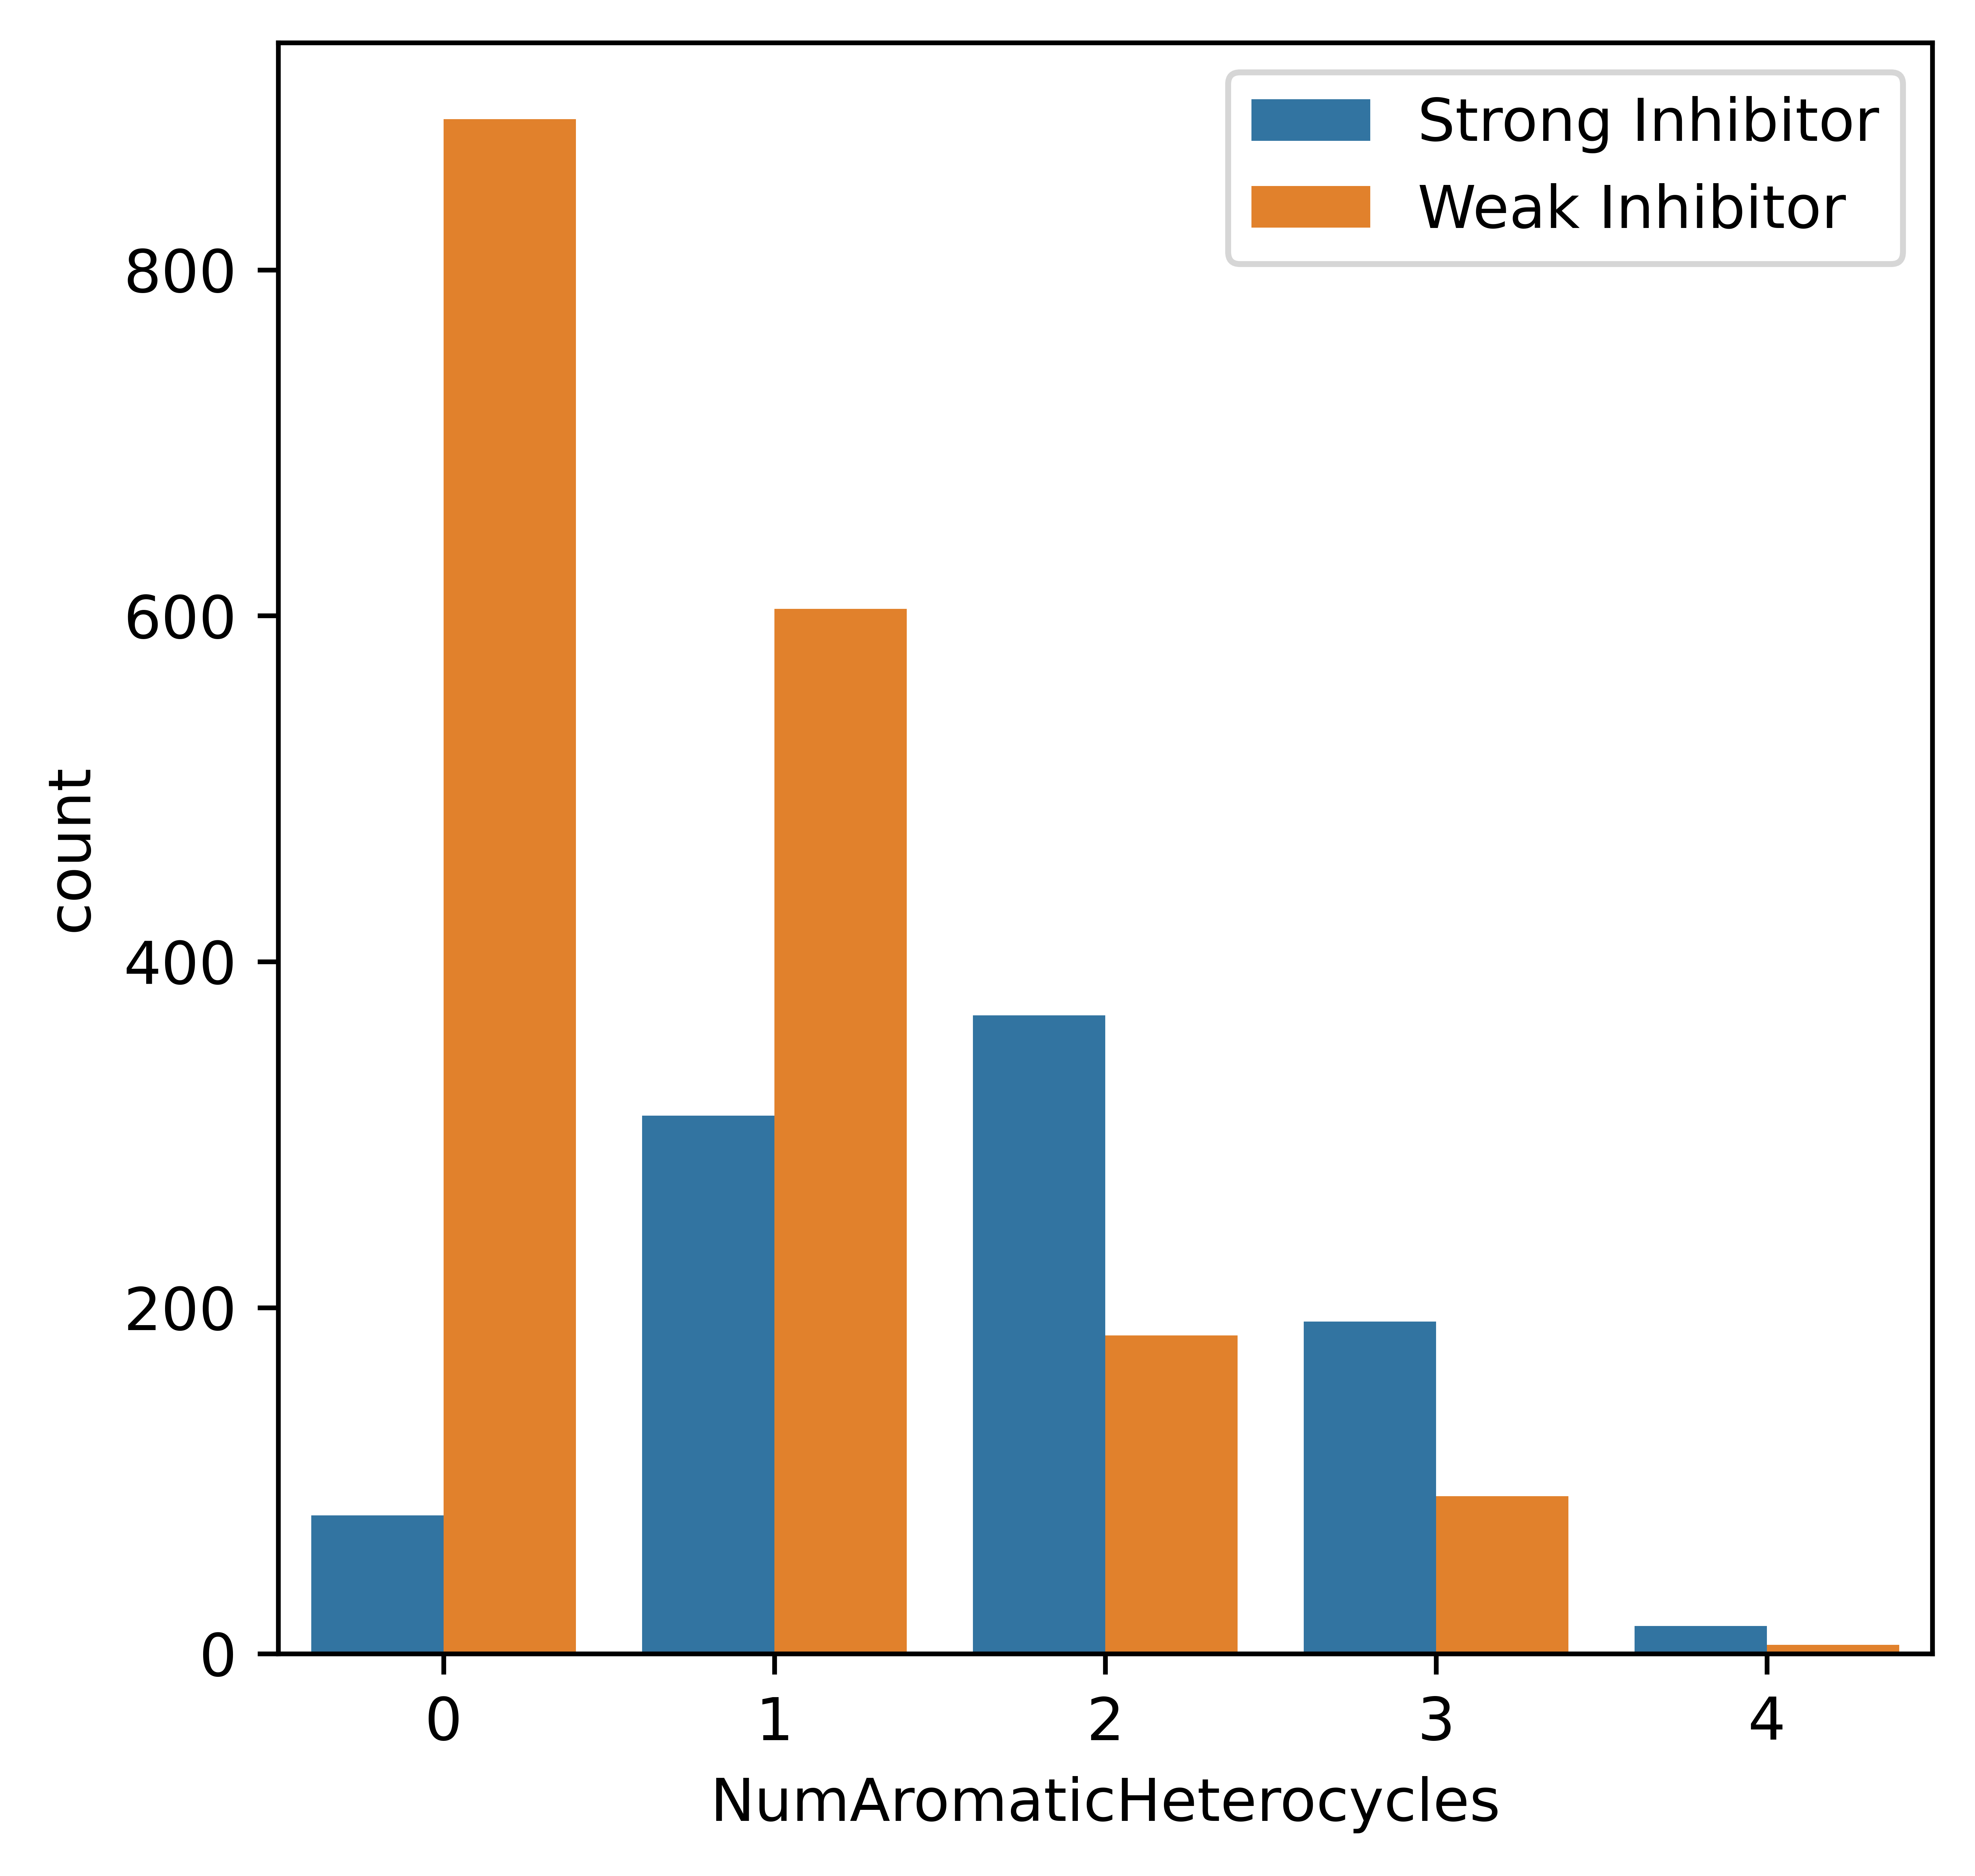

In [47]:
plt.figure(figsize=(5,5),dpi=1200)
sns.countplot(data['NumAromaticHeterocycles'], hue=data['TARGET'])
plt.legend(loc='upper right')
plt.savefig(r'.\images\NumAromaticHeterocycles.png')

# NumAliphaticHeterocycles

E:\MY_FILES\Anaconda\envs\thesis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


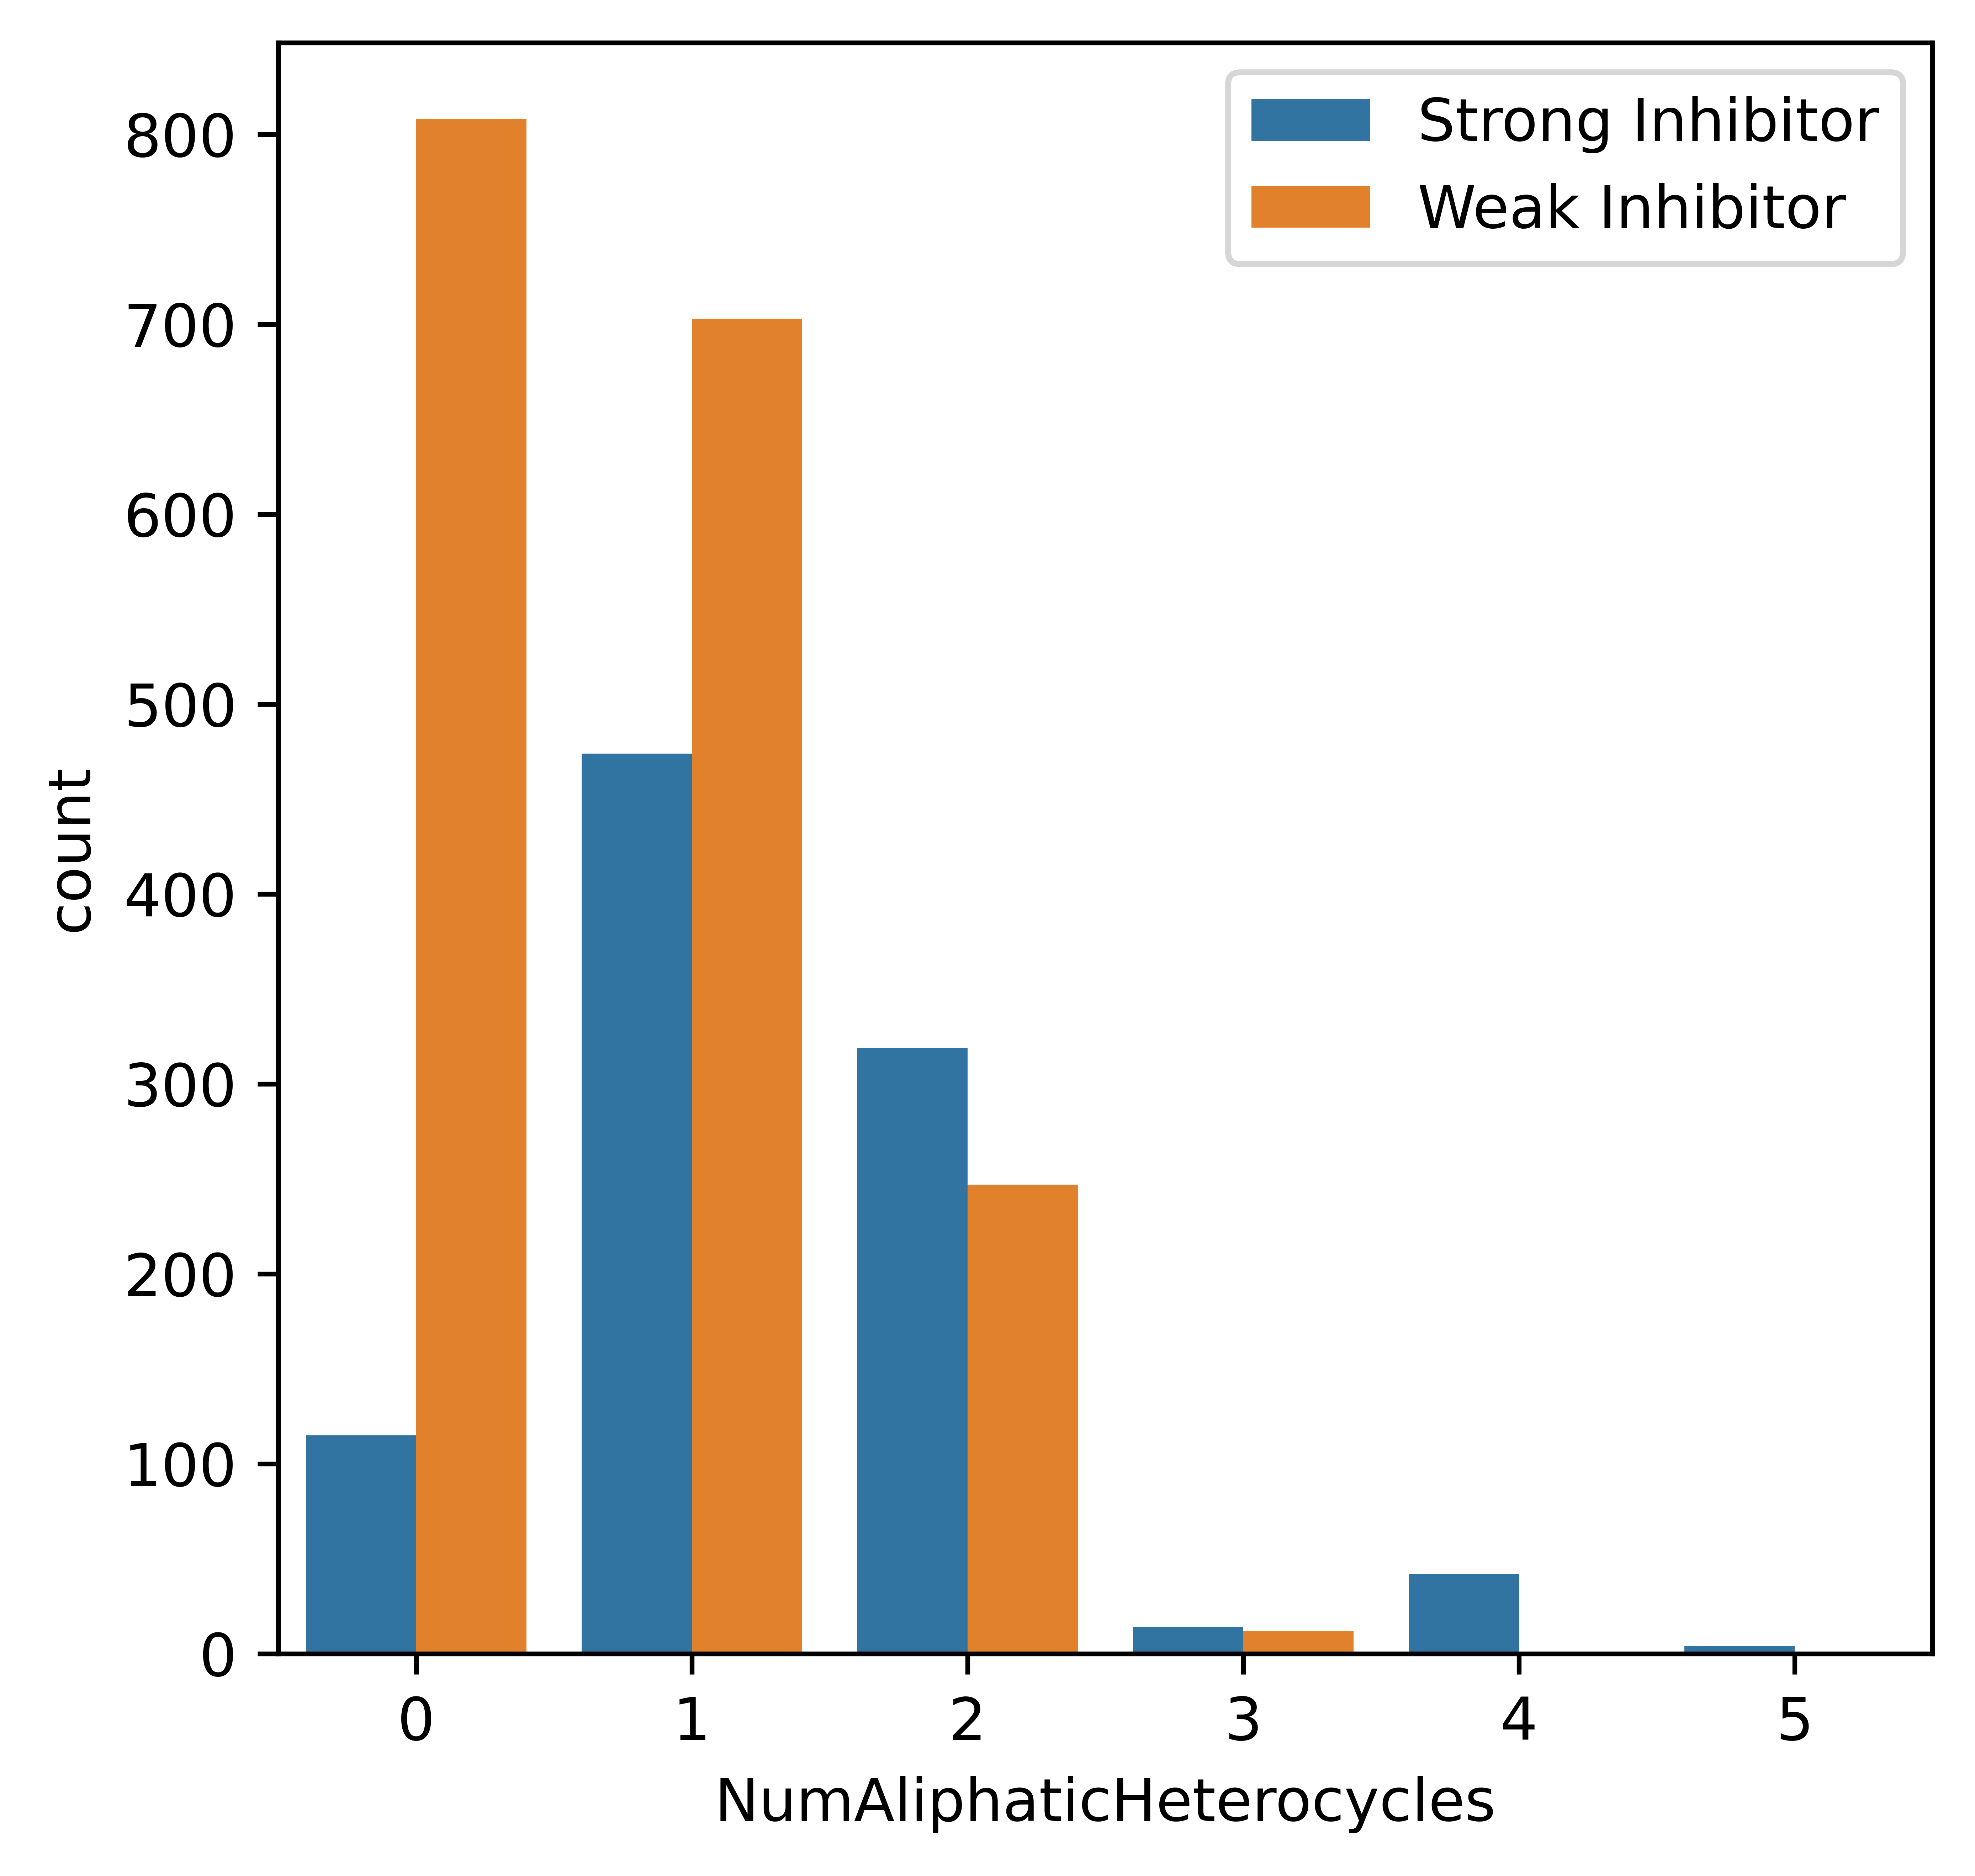

In [48]:
plt.figure(figsize=(5,5),dpi=1200)
sns.countplot(data['NumAliphaticHeterocycles'], hue=data['TARGET'])
plt.legend(loc='upper right')
plt.savefig(r'.\images\NumAliphaticHeterocycles.png')

# NumSaturatedHeterocycles

E:\MY_FILES\Anaconda\envs\thesis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


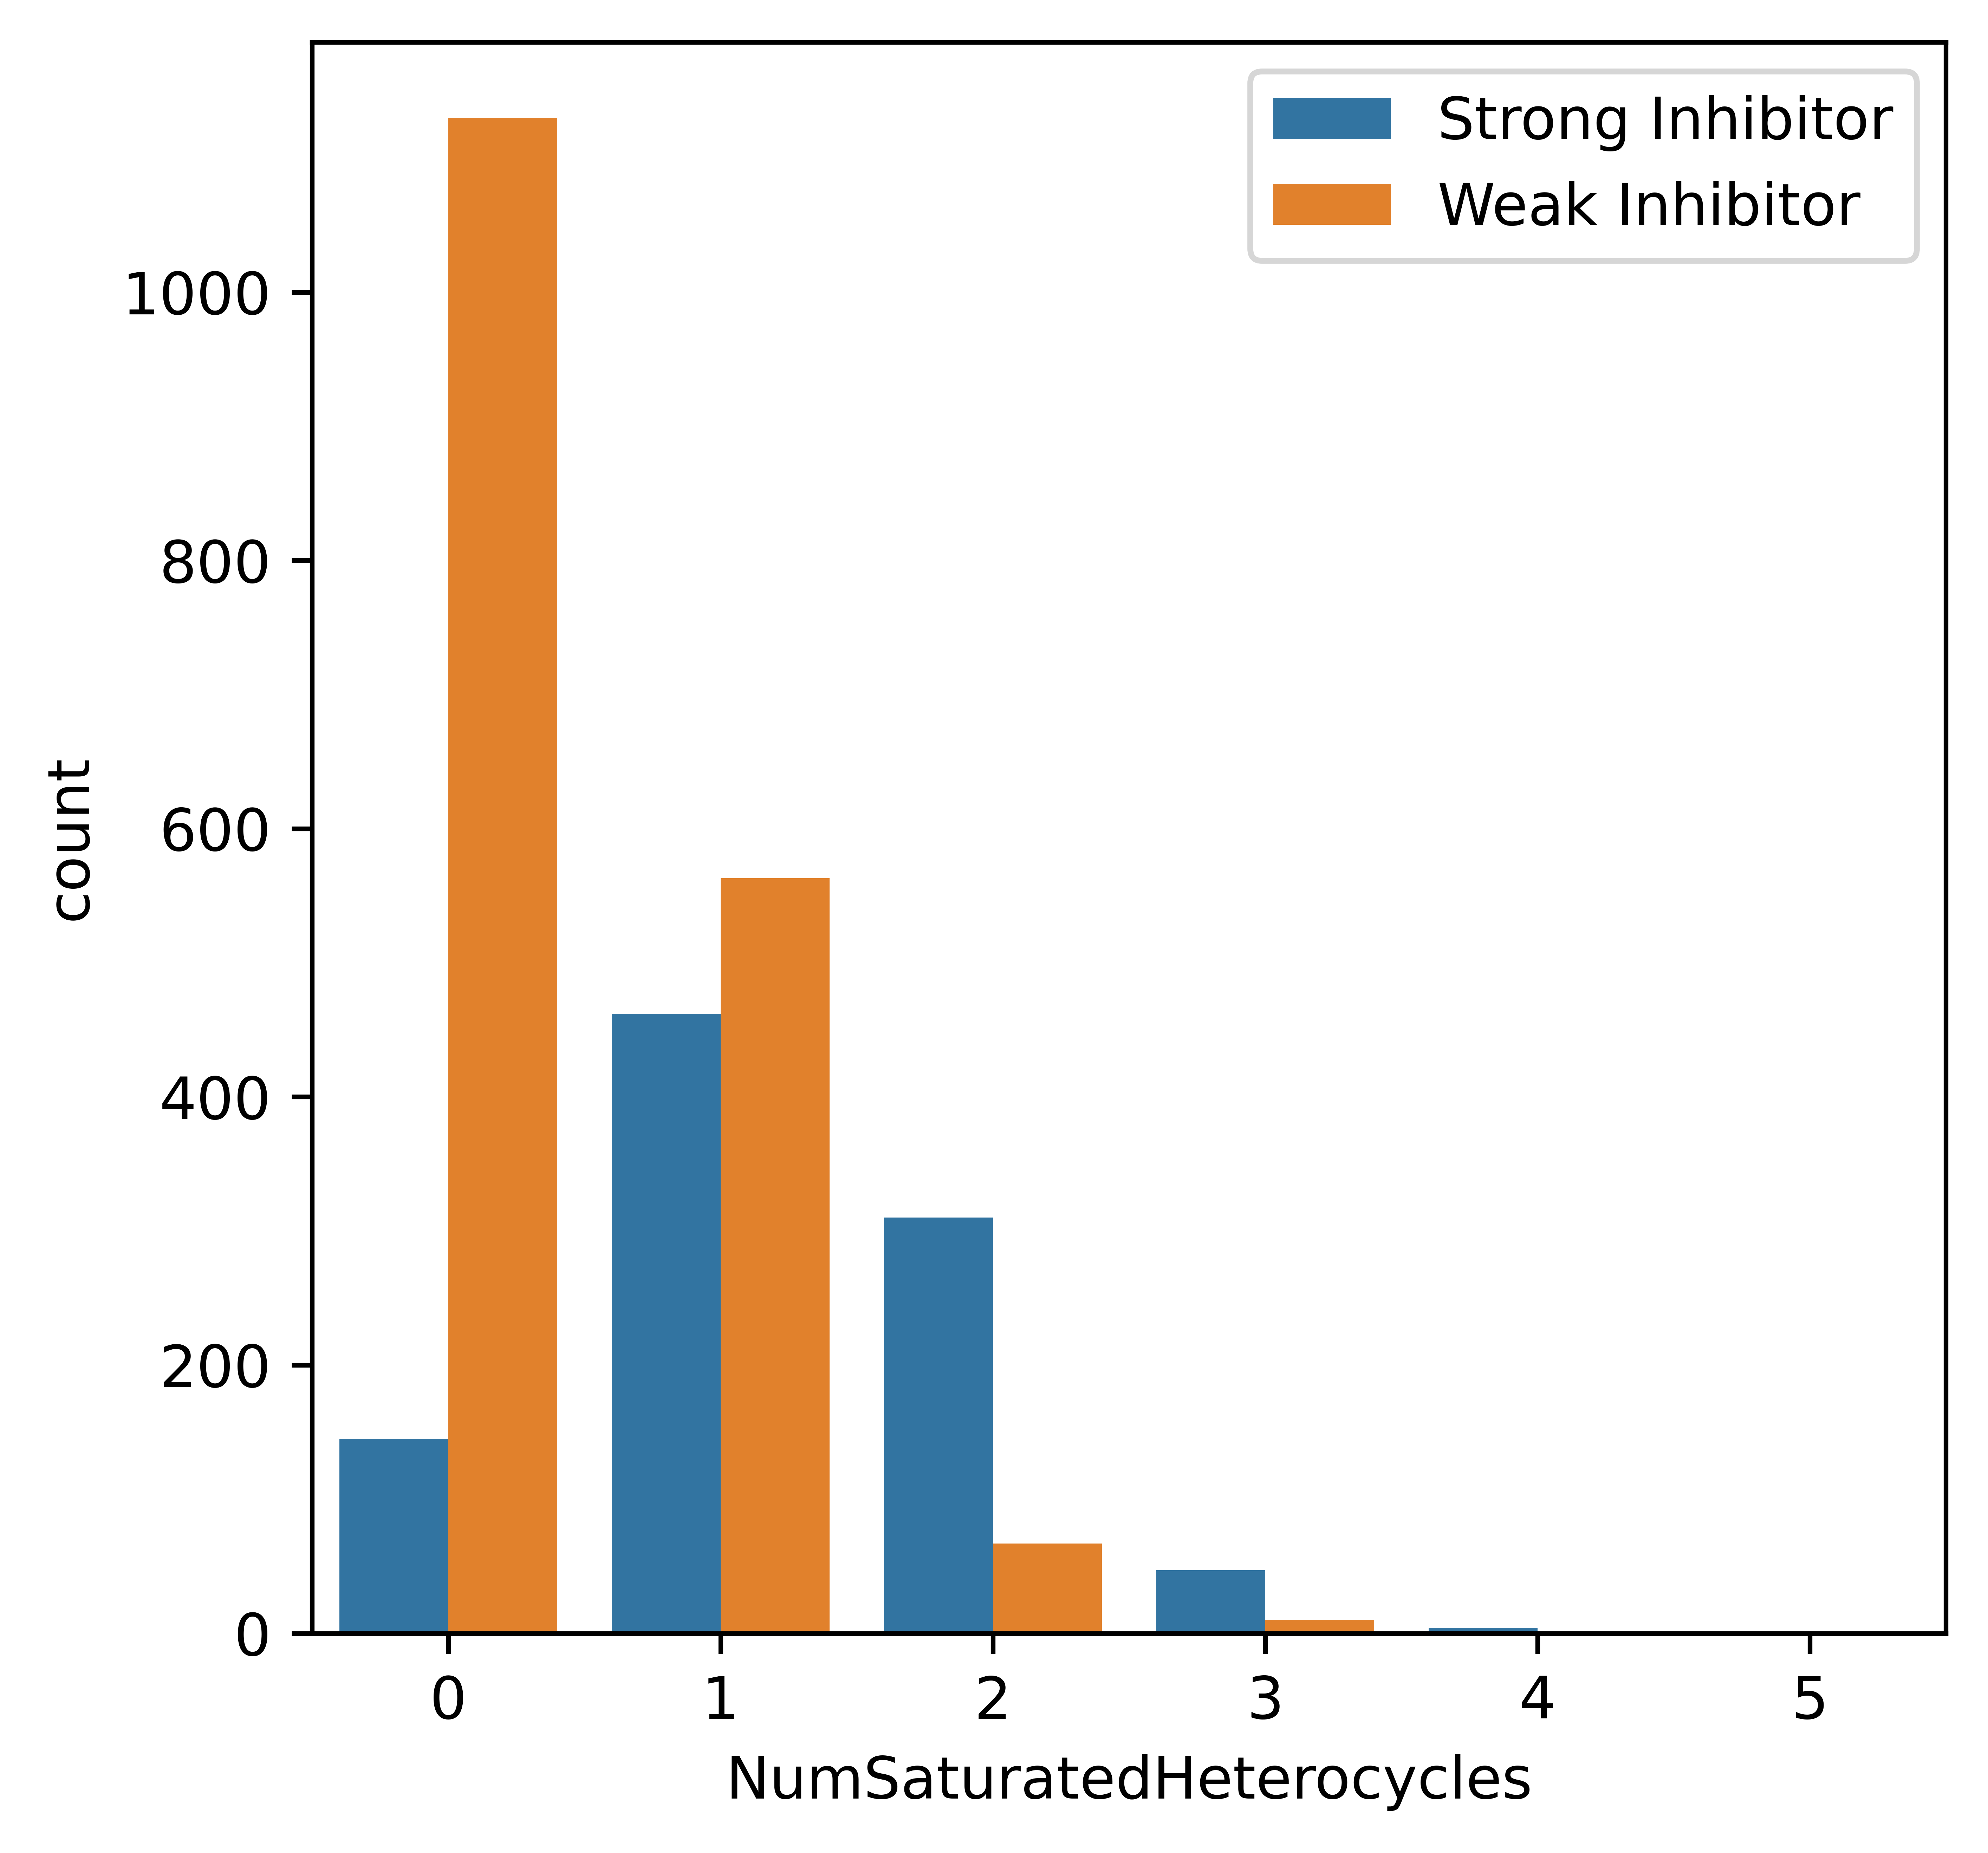

In [49]:
plt.figure(figsize=(5,5),dpi=1200)
sns.countplot(data['NumSaturatedHeterocycles'], hue=data['TARGET'])
plt.legend(loc='upper right')
plt.savefig(r'.\images\NumSaturatedHeterocycles.png')

# NumHAcceptors

E:\MY_FILES\Anaconda\envs\thesis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


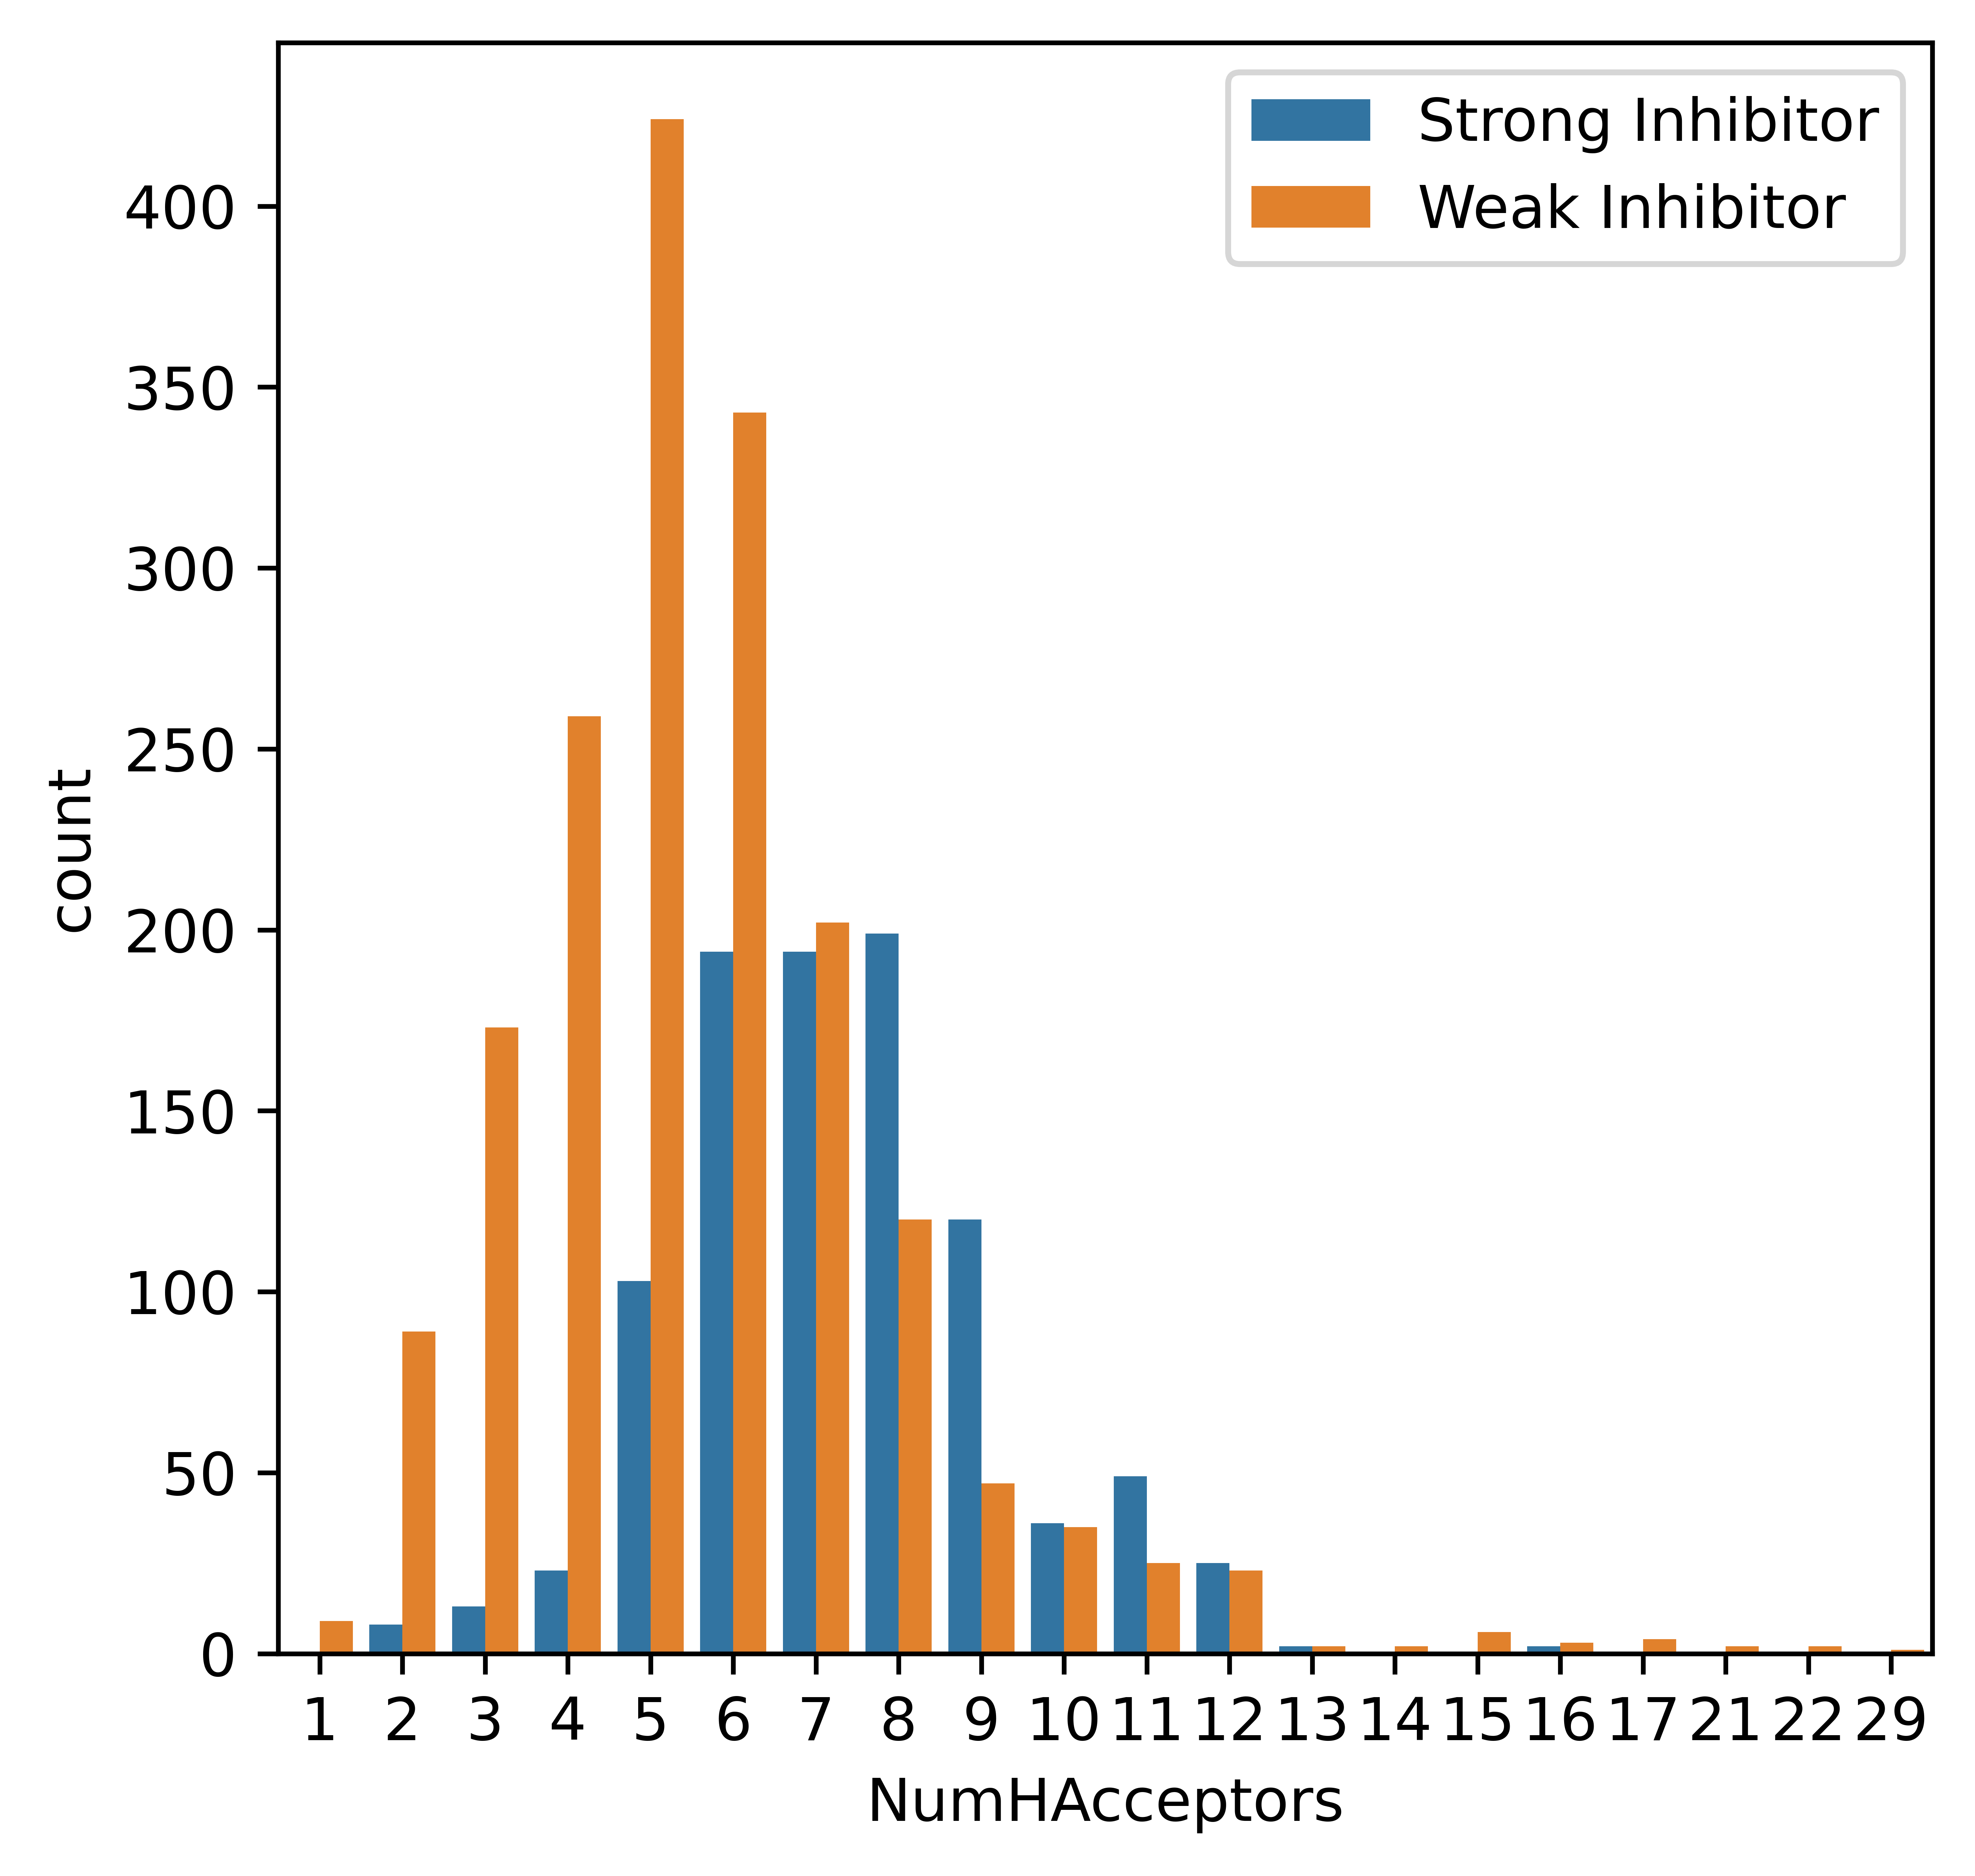

In [50]:
plt.figure(figsize=(5,5),dpi=1200)
sns.countplot(data['NumHAcceptors'], hue=data['TARGET'])
plt.legend(loc='upper right')
plt.savefig(r'.\images\NumHAcceptors.png')

# NumHDonors

E:\MY_FILES\Anaconda\envs\thesis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


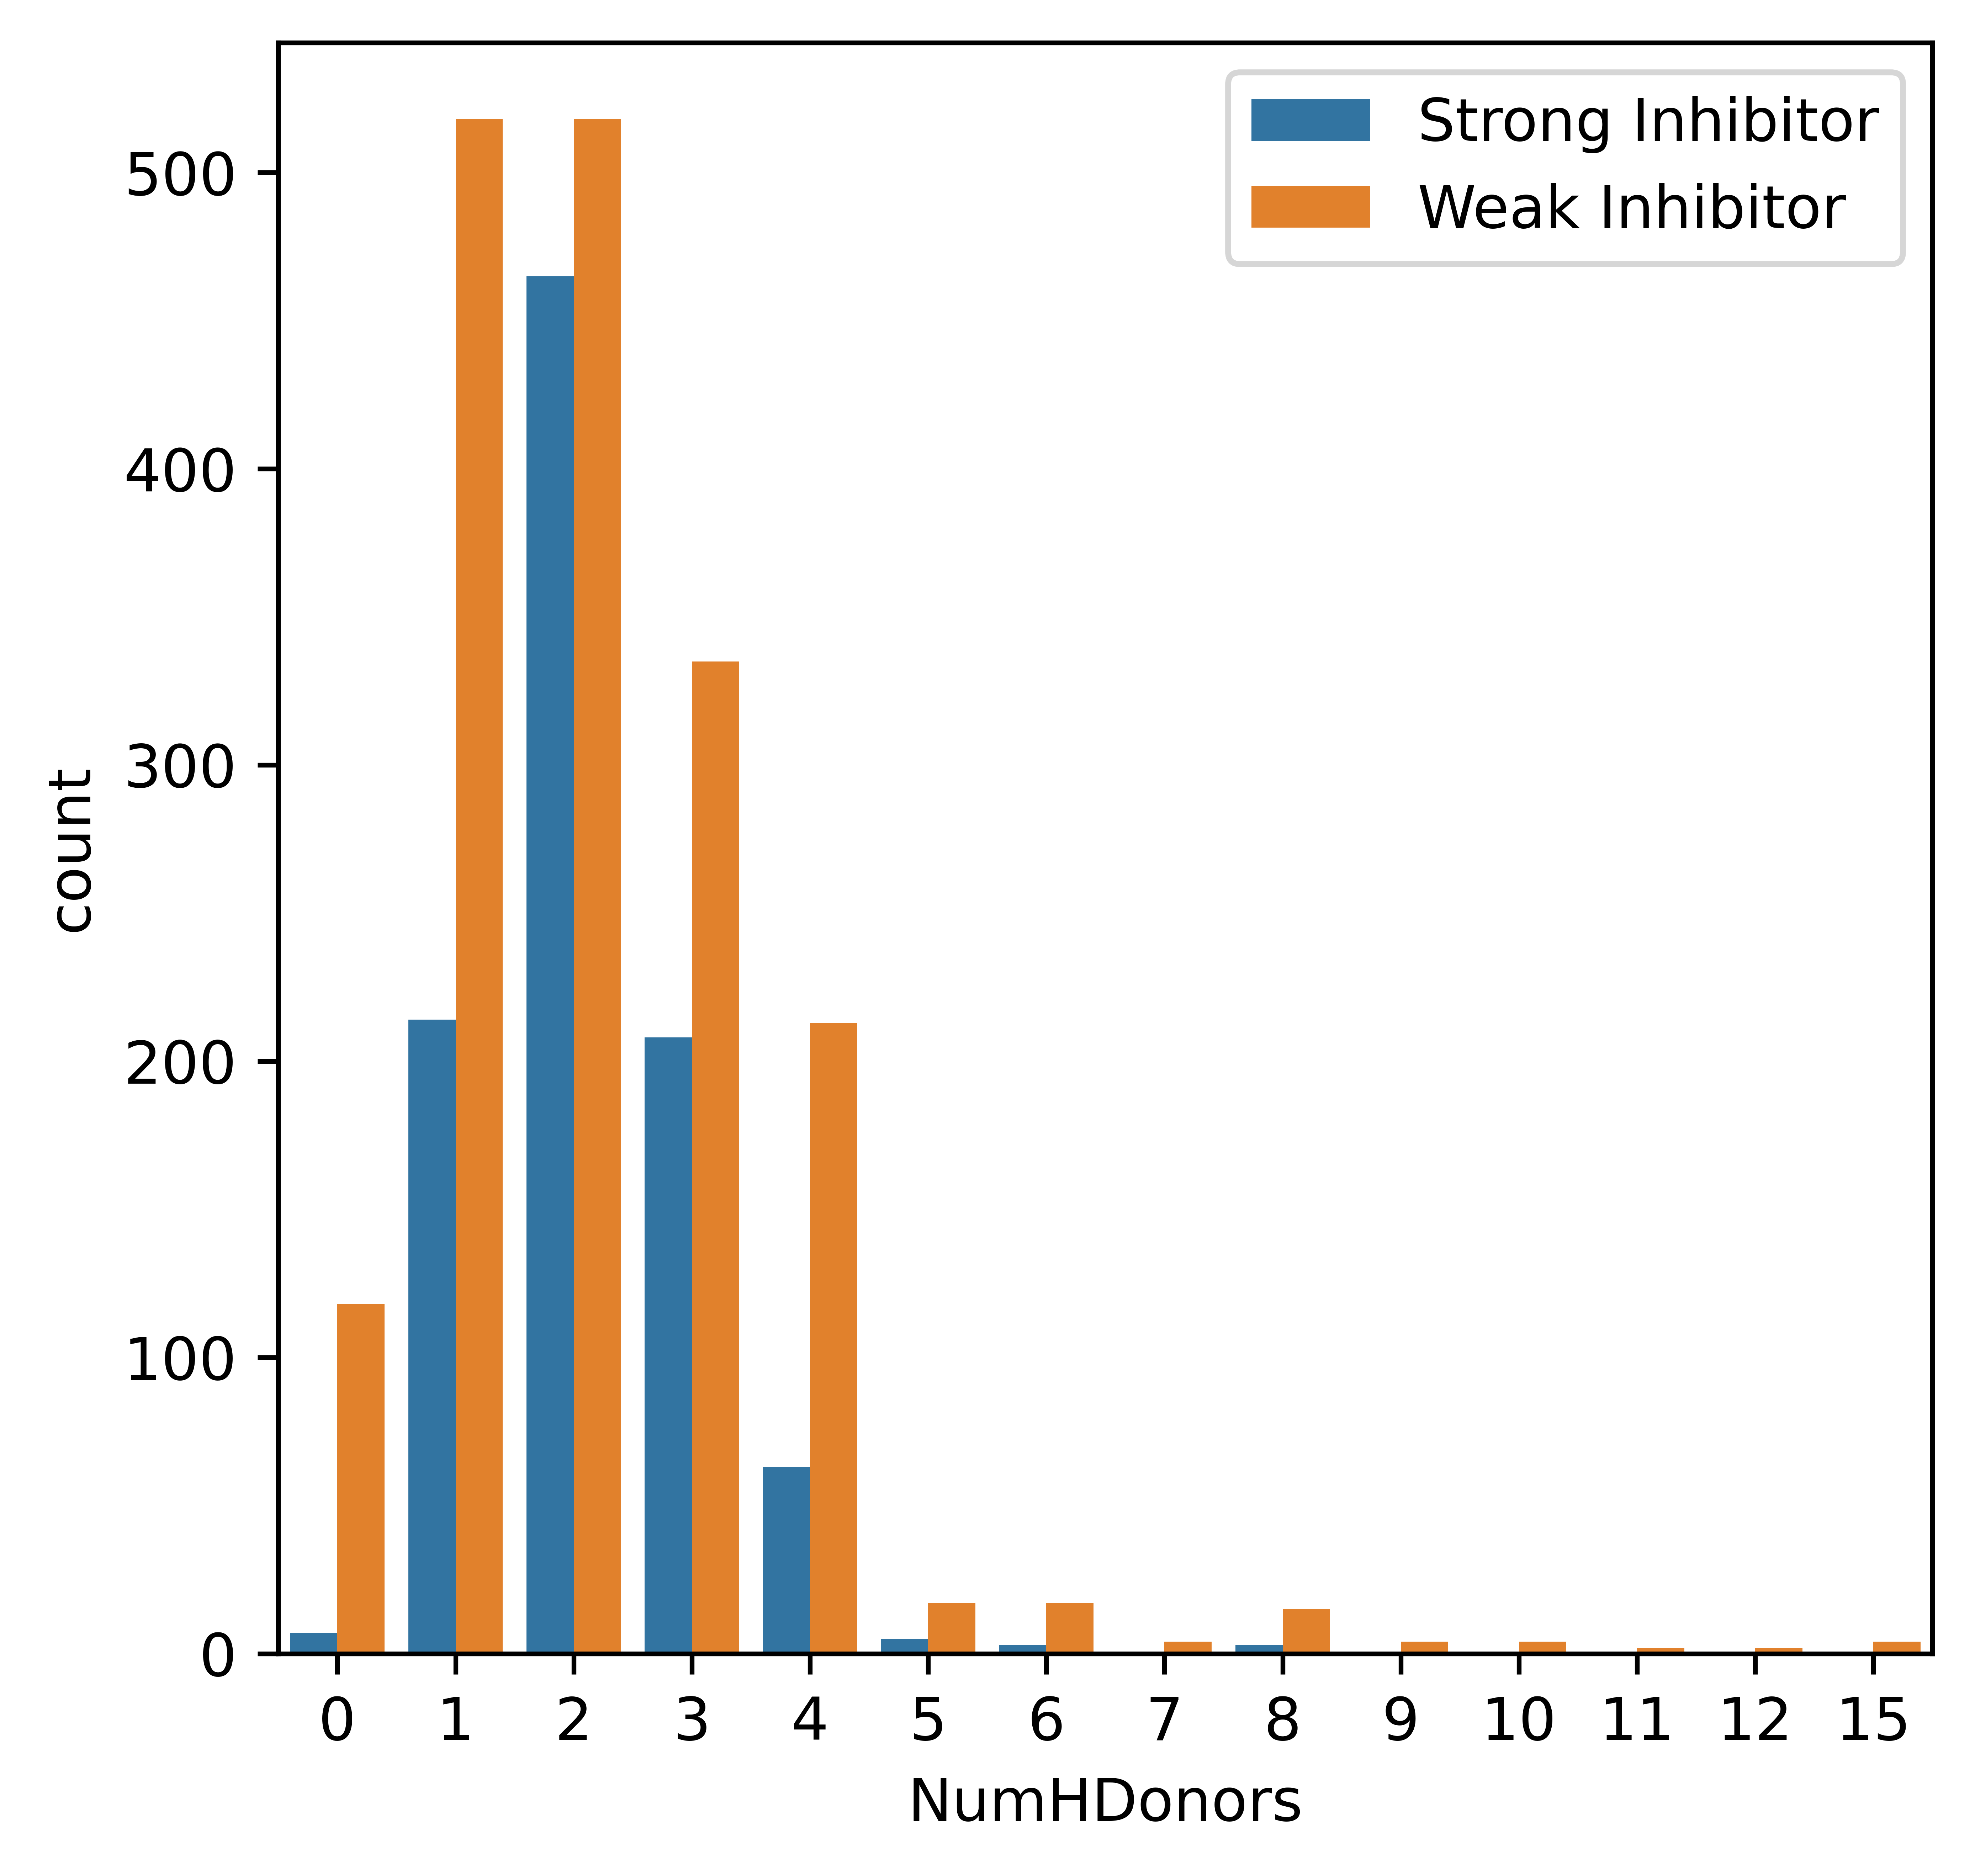

In [51]:
plt.figure(figsize=(5,5),dpi=1200)
sns.countplot(data['NumHDonors'], hue=data['TARGET'])
plt.legend(loc='upper right')
plt.savefig(r'.\images\NumHDonors.png')

# NumHeteroatoms

E:\MY_FILES\Anaconda\envs\thesis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


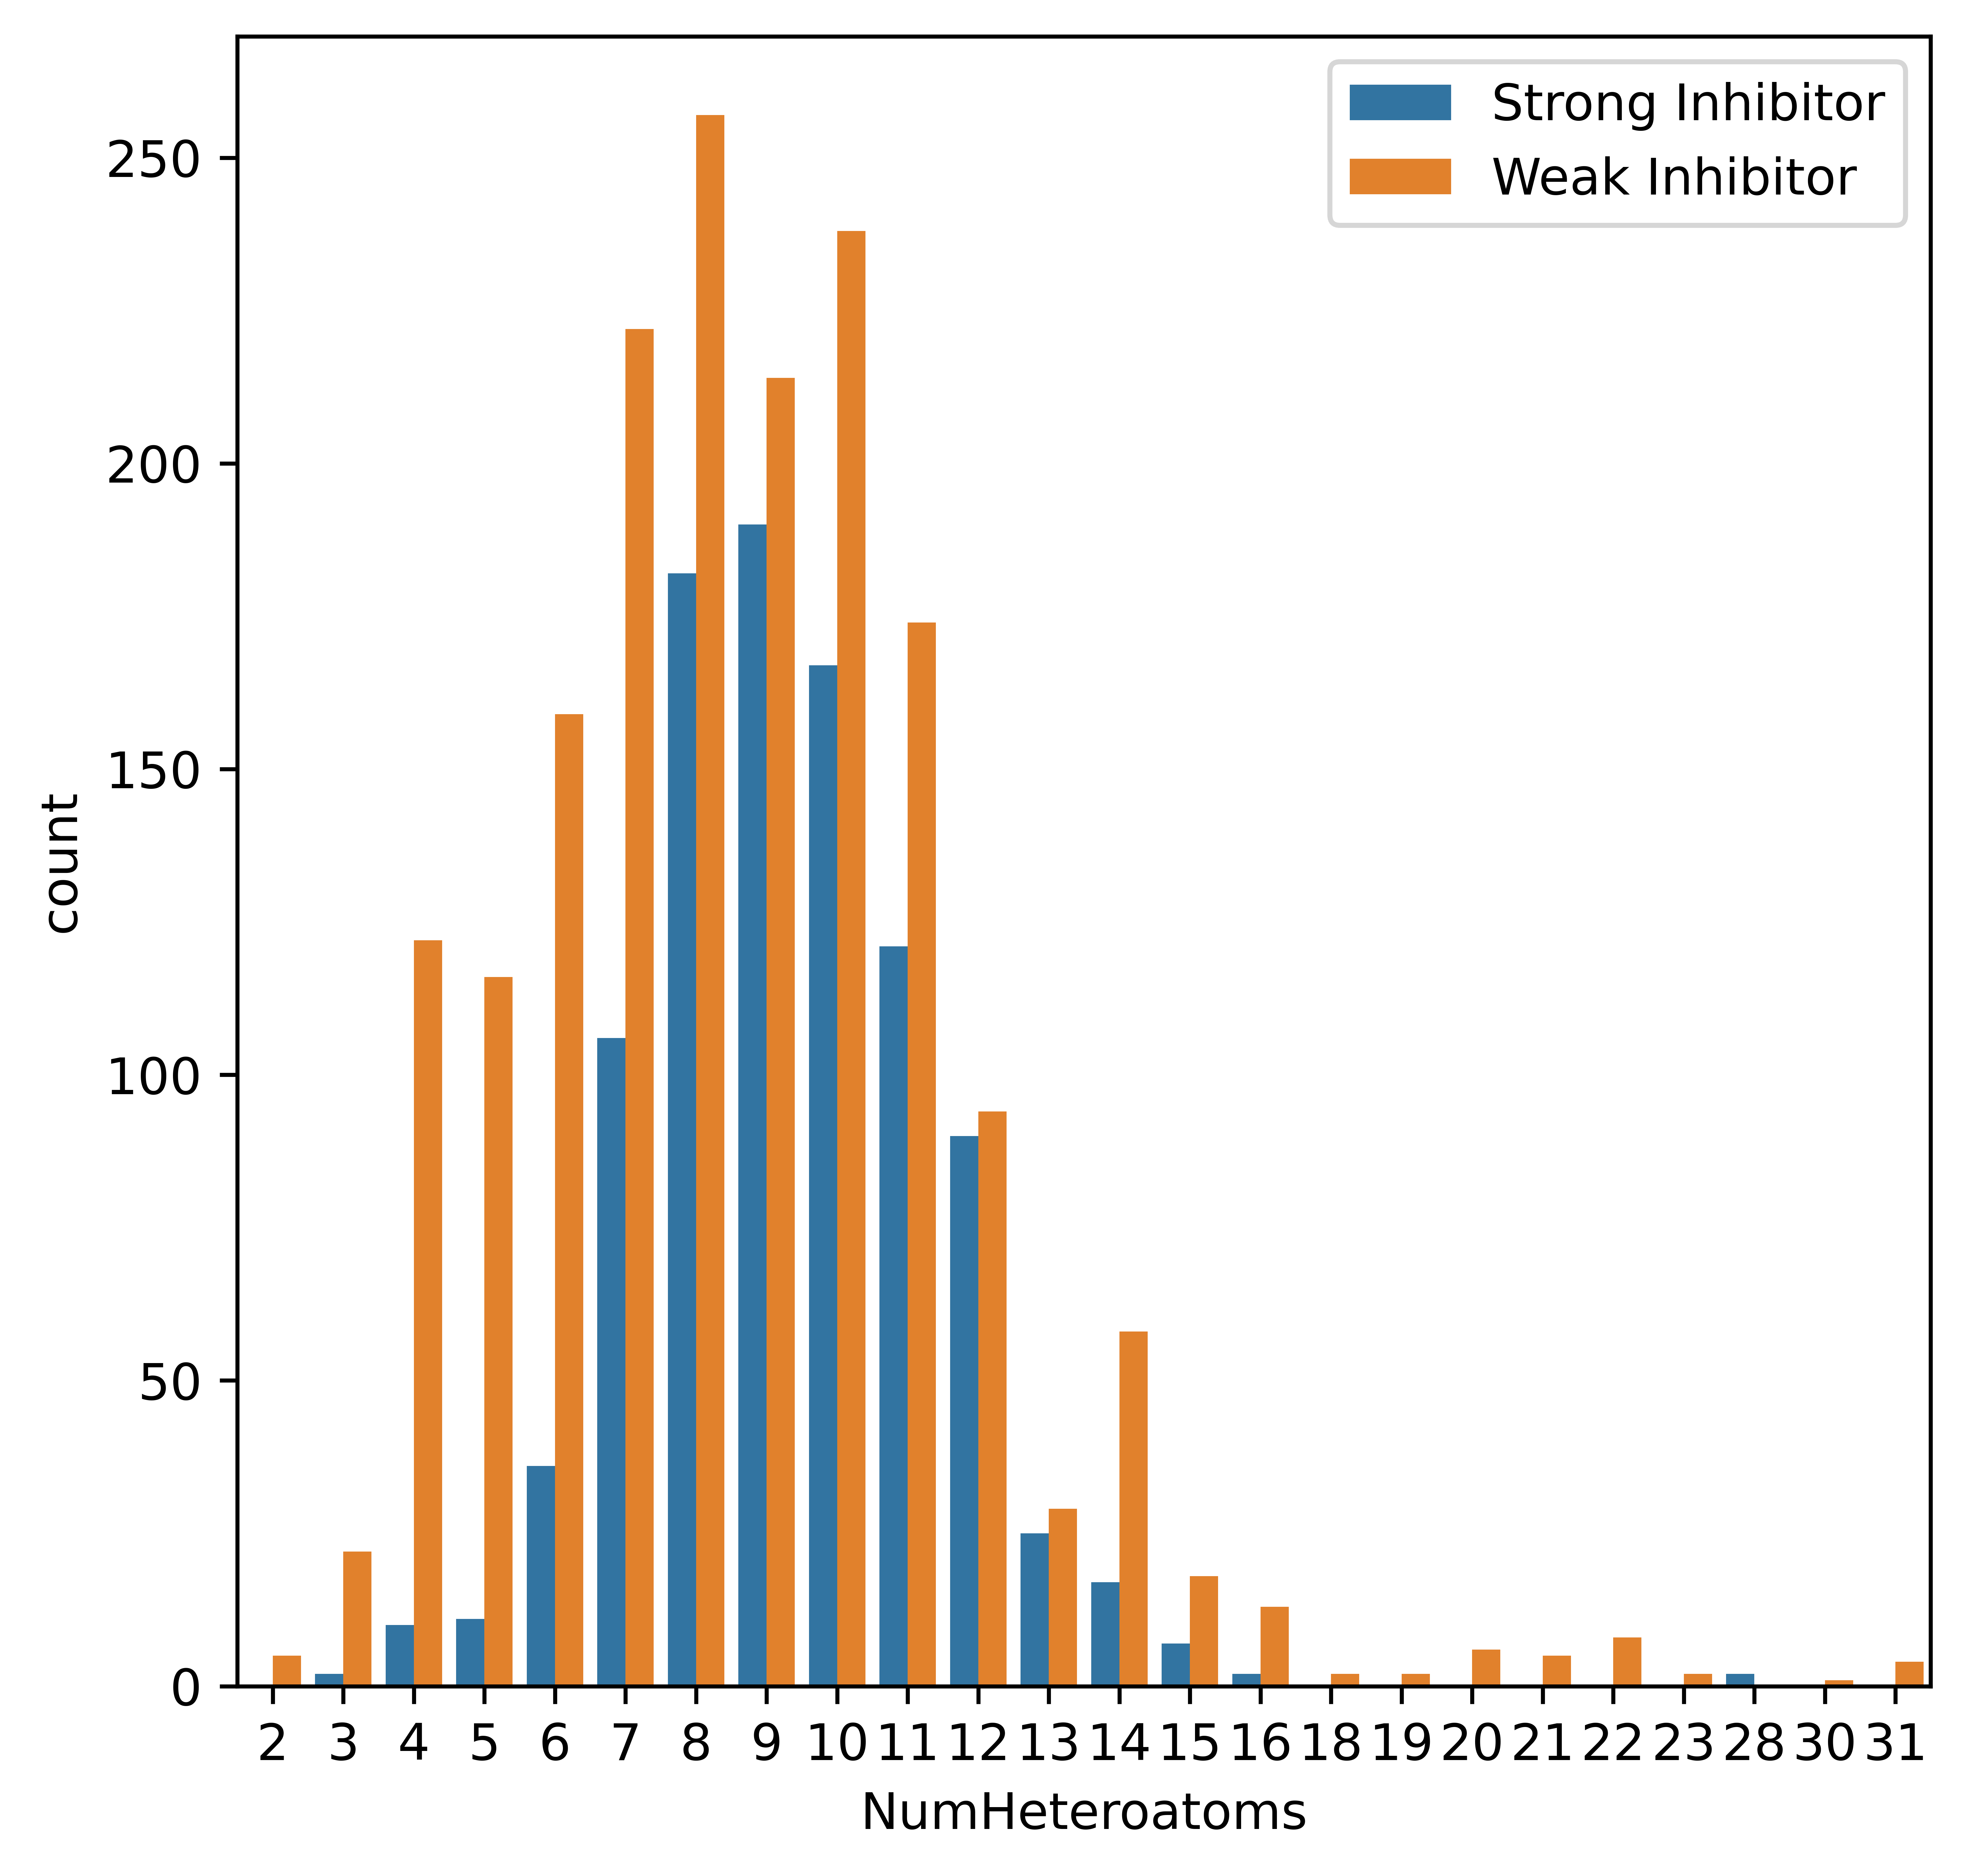

In [52]:
plt.figure(figsize=(6,6),dpi=1200)
sns.countplot(data['NumHeteroatoms'], hue=data['TARGET'])
plt.legend(loc='upper right')
plt.savefig(r'.\images\NumHeteroatoms.png')

# NumRotatableBonds

In [52]:
plt.figure(figsize=(8,8),dpi=1200)
sns.countplot(data['NumRotatableBonds'], hue=data['TARGET'])
plt.legend(loc='upper right')

E:\MY_FILES\Anaconda\envs\thesis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


# 13 features selected by GA

In [ ]:
'MaxPartialCharge', 'FpDensityMorgan2', 'BCUT2D_CHGLO', 'BCUT2D_MRHI',
'PEOE_VSA12', 'PEOE_VSA6', 'SMR_VSA3', 'SlogP_VSA3', 'SlogP_VSA8',
'EState_VSA6', 'NumHAcceptors', 'NumSaturatedCarbocycles','fr_bicyclic',

# MaxPartialCharge

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 8400x8400 with 0 Axes>

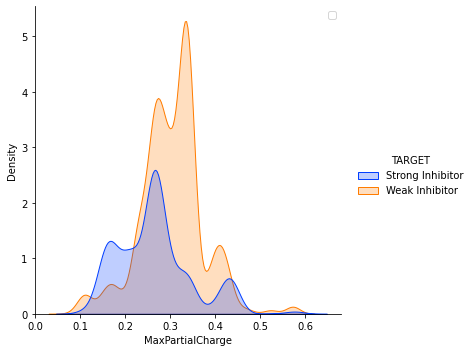

In [53]:
plt.figure(figsize=(7,7),dpi=1200)
sns.displot(data=data, x='MaxPartialCharge', hue='TARGET', kind='kde', fill=True, palette=sns.color_palette('bright')[:2])
plt.legend(loc='upper right')
# plt.title('Molecular weight')
plt.savefig(r'.\images\MaxPartialCharge.png')

# FpDensityMorgan2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 8400x8400 with 0 Axes>

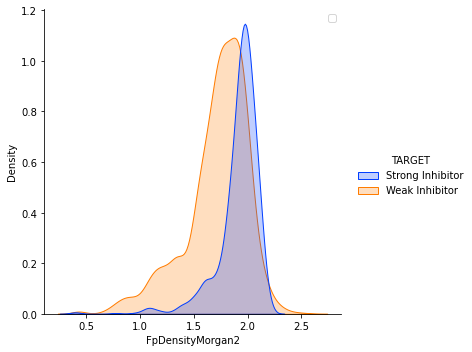

In [54]:
plt.figure(figsize=(7,7),dpi=1200)
sns.displot(data=data, x='FpDensityMorgan2', hue='TARGET', kind='kde', fill=True, palette=sns.color_palette('bright')[:2])
plt.legend(loc='upper right')
plt.savefig(r'.\images\FpDensityMorgan2.png')

# BCUT2D_CHGLO

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 8400x8400 with 0 Axes>

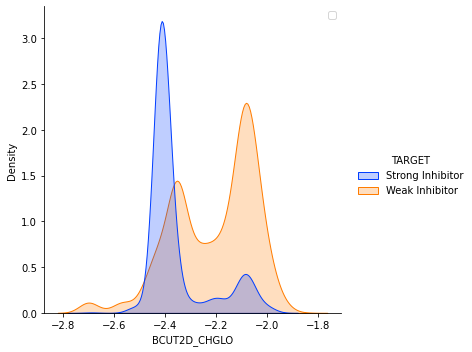

In [55]:
plt.figure(figsize=(7,7),dpi=1200)
sns.displot(data=data, x='BCUT2D_CHGLO', hue='TARGET', kind='kde', fill=True, palette=sns.color_palette('bright')[:2])
plt.legend(loc='upper right')
plt.savefig(r'.\images\BCUT2D_CHGLO.png')

# BCUT2D_MRHI

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 8400x8400 with 0 Axes>

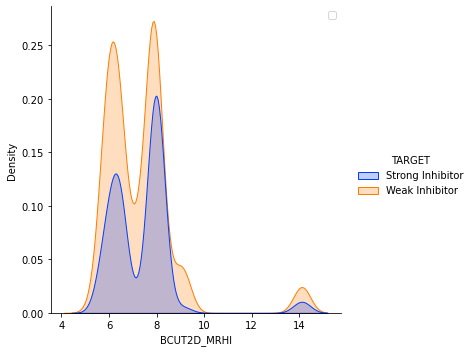

In [56]:
plt.figure(figsize=(7,7),dpi=1200)
sns.displot(data=data, x='BCUT2D_MRHI', hue='TARGET', kind='kde', fill=True, palette=sns.color_palette('bright')[:2])
plt.legend(loc='upper right')
plt.savefig(r'.\images\BCUT2D_MRHI.png')

# PEOE_VSA12

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 8400x8400 with 0 Axes>

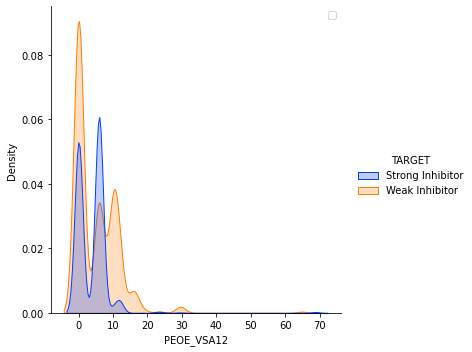

In [57]:
plt.figure(figsize=(7,7),dpi=1200)
sns.displot(data=data, x='PEOE_VSA12', hue='TARGET', kind='kde', fill=True, palette=sns.color_palette('bright')[:2])
plt.legend(loc='upper right')
plt.savefig(r'.\images\PEOE_VSA12.png')

# PEOE_VSA6

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 8400x8400 with 0 Axes>

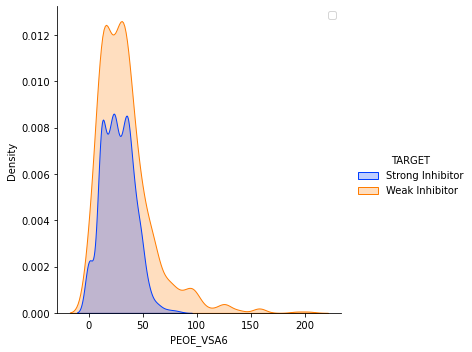

In [58]:
plt.figure(figsize=(7,7),dpi=1200)
sns.displot(data=data, x='PEOE_VSA6', hue='TARGET', kind='kde', fill=True, palette=sns.color_palette('bright')[:2])
plt.legend(loc='upper right')
plt.savefig(r'.\images\PEOE_VSA6.png')

# SMR_VSA3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 8400x8400 with 0 Axes>

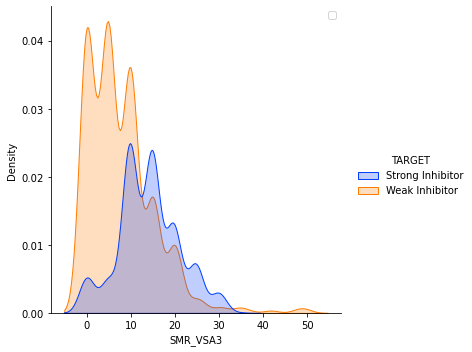

In [59]:
plt.figure(figsize=(7,7),dpi=1200)
sns.displot(data=data, x='SMR_VSA3', hue='TARGET', kind='kde', fill=True, palette=sns.color_palette('bright')[:2])
plt.legend(loc='upper right')
plt.savefig(r'.\images\SMR_VSA3.png')

# SlogP_VSA3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 8400x8400 with 0 Axes>

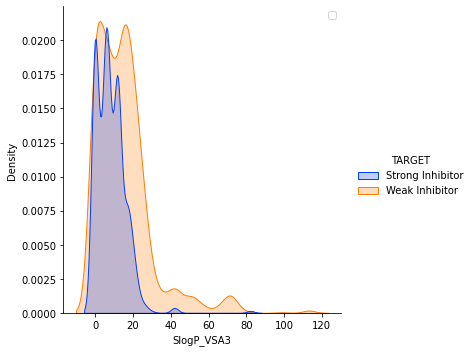

In [60]:
plt.figure(figsize=(7,7),dpi=1200)
sns.displot(data=data, x='SlogP_VSA3', hue='TARGET', kind='kde', fill=True, palette=sns.color_palette('bright')[:2])
plt.legend(loc='upper right')
plt.savefig(r'.\images\SlogP_VSA3.png')

# SlogP_VSA8

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 8400x8400 with 0 Axes>

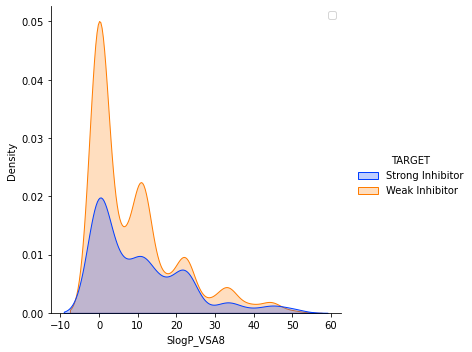

In [61]:
plt.figure(figsize=(7,7),dpi=1200)
sns.displot(data=data, x='SlogP_VSA8', hue='TARGET', kind='kde', fill=True, palette=sns.color_palette('bright')[:2])
plt.legend(loc='upper right')
plt.savefig(r'.\images\SlogP_VSA8.png')

# EState_VSA6

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 8400x8400 with 0 Axes>

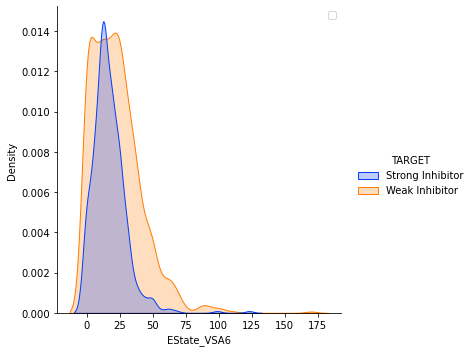

In [62]:
plt.figure(figsize=(7,7),dpi=1200)
sns.displot(data=data, x='EState_VSA6', hue='TARGET', kind='kde', fill=True, palette=sns.color_palette('bright')[:2])
plt.legend(loc='upper right')
plt.savefig(r'.\images\EState_VSA6.png')

# fr_bicyclic

In [63]:
plt.figure(figsize=(7,7),dpi=1200)
sns.countplot(data['fr_bicyclic'], hue=data['TARGET'])
plt.legend(loc='upper right')
plt.savefig(r'.\images\fr_bicyclic.png')

E:\MY_FILES\Anaconda\envs\thesis\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
